<a href="https://colab.research.google.com/github/Andabe-Net/Neural-Networks-Foundations-and-Applications/blob/main/deep-learning-with-pytorch/deep_learning_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title FROM LINEAR MODELS TO DEEP NUERAL NETWORKS WITH PYTORCH


In [ ]:
import torch
import matplotlib.pyplot as plt


In [ ]:
#setting device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
#pytorch works with tensors
tensor = torch.tensor([1,2,3])


In [ ]:
#check current device where data is located
tensor.device

device(type='cpu')

In [ ]:
#it is important to move data and models to the same device to work with
tensor_on_cpu = tensor.to(device)
tensor_on_cpu

tensor([1, 2, 3])

In [ ]:
tensor_on_cpu.cpu().device

device(type='cpu')

In [ ]:
#How to do differentiation with pytorch, torch uses auto_grad for automatic differentiation
a=torch.tensor([2.0,3.0], requires_grad=True)
b=torch.tensor([1.0,2.0], requires_grad=True)
y=(a*b+2*a+2*b).sum()
y.backward()
a.grad, b.grad

(tensor([3., 4.]), tensor([4., 5.]))

In [ ]:
tensor_on_cpu.device

device(type='cpu')

In [ ]:
#prepare simple data for linear regression

X= torch.arange(0,1, 0.01).unsqueeze(dim=1)
Y = 0.5*X + 4
train_size = int(0.8*len(X))
X_train, Y_train = X[:train_size], Y[:train_size]
X_test, Y_test = X[train_size:], Y[train_size:]
X.shape, X_train.shape, Y_train.shape

(torch.Size([100, 1]), torch.Size([80, 1]), torch.Size([80, 1]))

Text(0, 0.5, 'Y')

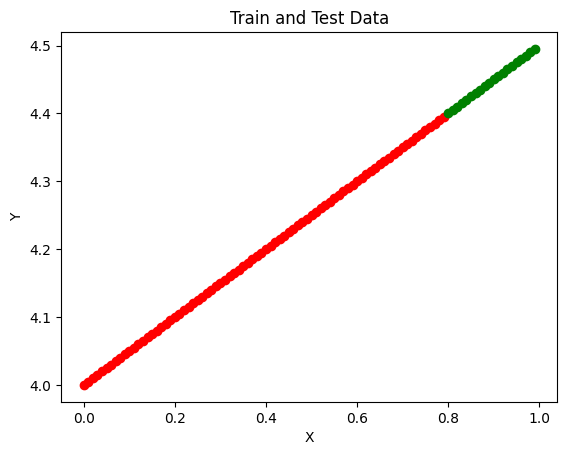

In [ ]:
#visualize distribution of train data and test data
X_data, X_label = X_train, Y_train
test_data, test_label = X_test, Y_test
plt.scatter(X_data, X_label, c='r')
plt.scatter(test_data, test_label, c='g')
plt.title('Train and Test Data')
plt.xlabel('X')
plt.ylabel('Y')

The torch, package "contains data structures for multi-dimensional tensors and

defines mathematical operations over these tensors. Additionally, it provides

many utilities for efficient serialization of Tensors and arbitrary types, and

other useful utilities." The building blocks for graphs or neural network
  
architectures are found in the torch.nn module.

SOME TIPS

1.torch.utils.data.Dataset for datasets

2.torch.utils.data.Dataloaders for dataloaders

or

torchvision.transforms for computer vision transforms

3.torch.nn contains all building blocks for graghs

4.torch.nn.module is the base class for all neural network modules, all neural

network classes will subclass this class.

or torchvision.Models for built-in computer vision models

5.nn.Parameters gives the parameters of a model

6.override forward method in the neural network class to return predictions

7.torch.Optim for choice of optimizers


torchmetrics, torch.utils.tensorboard




In [ ]:
from torch import nn

In [ ]:
class LinearModel(nn.Module):
  def __init__(self):
    super().__init__()
    #initialize random parameters
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
  #override foward method
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias





In [ ]:
#instantiate a model
torch.manual_seed(42)
model_0 = LinearModel()

In [ ]:
#model parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#model state
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
#make predictions on test data with the model state without training
preds = model_0(X_test)
error = torch.abs(Y_test-preds).mean()
preds

tensor([[0.3982],
        [0.4015],
        [0.4049],
        [0.4083],
        [0.4116],
        [0.4150],
        [0.4184],
        [0.4217],
        [0.4251],
        [0.4285],
        [0.4318],
        [0.4352],
        [0.4386],
        [0.4419],
        [0.4453],
        [0.4487],
        [0.4520],
        [0.4554],
        [0.4588],
        [0.4621]], grad_fn=<AddBackward0>)

In [ ]:
#I can ask pytorch to do forward calculatiions on test with inference mode. But first, it is good to put the model in evaluation mode
model_0.eval()
with torch.inference_mode():
  preds = model_0(X_test)
preds

tensor([[0.3982],
        [0.4015],
        [0.4049],
        [0.4083],
        [0.4116],
        [0.4150],
        [0.4184],
        [0.4217],
        [0.4251],
        [0.4285],
        [0.4318],
        [0.4352],
        [0.4386],
        [0.4419],
        [0.4453],
        [0.4487],
        [0.4520],
        [0.4554],
        [0.4588],
        [0.4621]])

Text(0, 0.5, 'Y')

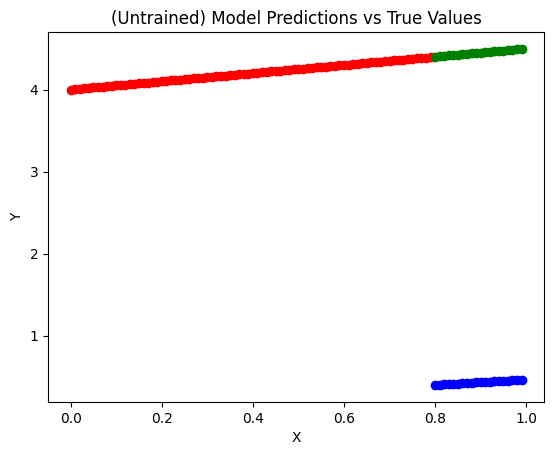

In [ ]:
#compare
plt.scatter(X_test, preds.detach().numpy(), c='b')
plt.scatter(X_train, Y_train, c='r')
plt.scatter(X_test, Y_test, c='g')
plt.title('(Untrained) Model Predictions vs True Values')
plt.xlabel('X')
plt.ylabel('Y')

In [ ]:
#To train Model
#choose loss function, optimizer and Put model in Train mode to train


In [ ]:
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr =0.01 )

In [ ]:
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'fused': None,
   'params': [0, 1]}]}

In [ ]:
#model.train() for train mode and model.eval() for evaluation mode

In [ ]:
torch.manual_seed(42)
#train
model_0.train()
epochs = 1000
epoch_count = []
loss_count = []


for epoch in range (epochs):
  #forward to calulate predictions
  y_preds = model_0(X_train)

  #calculate loss
  loss = criterion(y_preds, Y_train)

  #zero_grad() to refresh accumulated gradients
  optimizer.zero_grad()

  #back propagate to calculate gradients
  loss.backward()

  #to do gradient descent, updating gradients
  optimizer.step()

  loss_count.append(loss)
  epoch_count.append(epoch)

In [ ]:
#torch.inference_mode() is torch.no_grad() on steroids!

train accuracy: 0.909725546836853


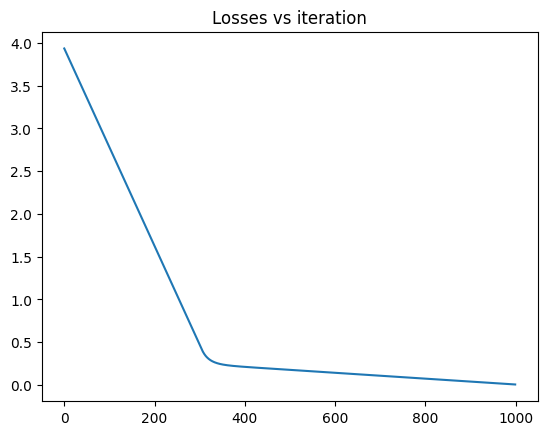

In [ ]:
model_0.eval()
with torch.inference_mode():
  error = (torch.abs(y_preds - Y_train)/Y_train).mean() * 100
  print(f"train accuracy: {1-error}")
  plt.plot(epoch_count, loss_count)
  plt.title("Losses vs iteration")


test accuracy: 0.8172369003295898


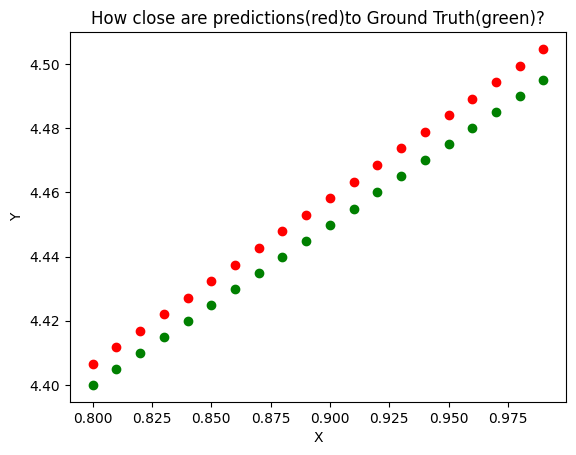

In [ ]:
#on test set
model_0.eval()
with torch.inference_mode():
  Y_preds = model_0(X_test)
  error = (torch.abs(Y_preds - Y_test)/Y_test).mean() * 100
  print(f"test accuracy: {1-error}")
  plt.scatter(X_test, Y_test, c ='g')
  plt.scatter(X_test, Y_preds, c= 'r')
  plt.title('How close are predictions(red)to Ground Truth(green)?')
  plt.ylabel('Y')
  plt.xlabel('X')



In [ ]:
#model state after training
model_0.state_dict()

OrderedDict([('weights', tensor([0.5171])), ('bias', tensor([3.9928]))])

In [ ]:
#Train a new model with Adam optimizer
model_00 = LinearModel()

In [ ]:
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(params = model_00.parameters(), lr =0.01)

In [ ]:
torch.manual_seed(42)
#training with Adam
model_00.train()
train_loss_count = []
test_loss_count = []
epoch_count =[]
epochs = 1000

#run train and test loops
for epoch in range(epochs):

  #foward
  Y_preds = model_00(X_train)
  train_loss = criterion(Y_preds, Y_train)

  #zero_grad()
  optimizer.zero_grad()

  #backpropagate
  train_loss.backward()

  #gradient update
  optimizer.step()

  train_loss_count.append(train_loss)
  epoch_count.append(epoch)

  #evaluate model state on test data eah iteration
  model_00.eval()
  with torch.inference_mode():
    test_preds = model_00(X_test)
    test_loss = criterion(test_preds, Y_test)
    test_loss_count.append(test_loss)

train accuracy: 0.9389538168907166
test accuracy: 0.9776464700698853


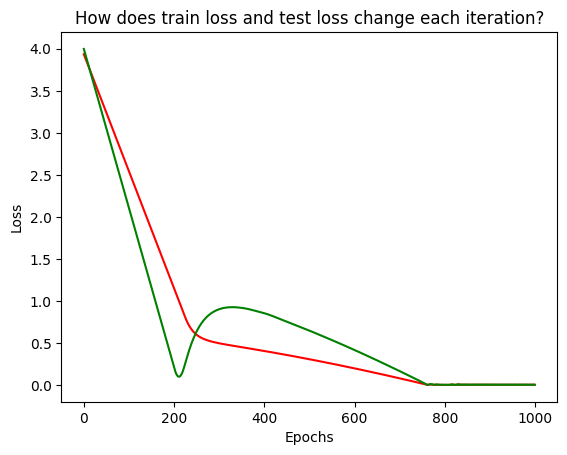

In [ ]:
model_00.eval()
with torch.inference_mode():
  error_train = (torch.abs(Y_preds - Y_train)/Y_train).mean() * 100
  print(f"train accuracy: {1-error_train}")

  error_test = (torch.abs(test_preds - Y_test)/Y_test).mean() * 100
  print(f"test accuracy: {1-error_test}")

  plt.plot(epoch_count, train_loss_count, c='r')
  plt.plot(epoch_count, test_loss_count, c= 'g')
  plt.title('How does train loss and test loss change each iteration?')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')

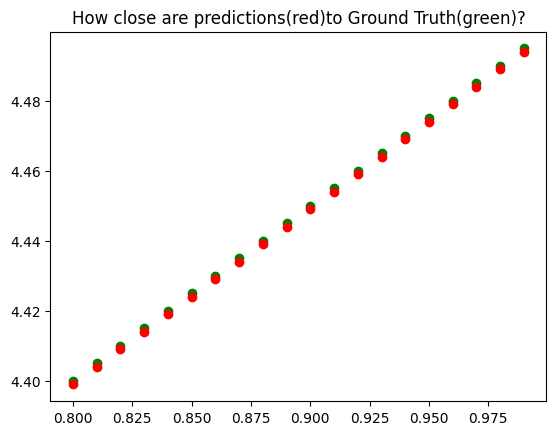

In [ ]:
#Test model_00 on test data
model_00.eval()
with torch.inference_mode():
  plt.title('How close are predictions(red)to Ground Truth(green)?')
  plt.scatter(X_test, Y_test, c ='g')
  plt.scatter(X_test, test_preds, c= 'r')

In [ ]:
#model_00 state after training
model_00.state_dict()

OrderedDict([('weights', tensor([0.5006])), ('bias', tensor([3.9985]))])

In [ ]:
#SOME OBSERVATIONS

# A large enough learning rate leads to divergence, a small enough learning rate slows down gradient update and therefore learning

# with Stochastic Gradient Descent, accuracy does not improve with more iterations because SGD does not converge but oscillates around the minima
#with a sufficiently small enough learning rate, SGD will oscillate very close to  the mininma

# with Adam, better accuracy was achieved with the same learning rate as SGD but it was very sensitive to change in learning rate value, why is that?

# "Adam optimizer does not inherently include learning rate schedules such as decay or annealing"

In [ ]:
# using nn.Linear
# We can use nn.Linear to define model parameters instead of using nn.Parameter

class LinearModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features = 1, out_features = 1)
  def forward(self, x: torch.Tensor)-> torch.Tensor:
    return self.linear_layer(x)


In [ ]:
model_01 = LinearModelV1()
model_01.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

                          ** SAVING AND LOADING MODEL STATE**

In [ ]:
# @title SAVING AND LOADING MODEL STATE

#use pathlib to create path to safe models
#torch.save(model.state_dict(), PATH) to save model.state_dict()
#torch.save(model, PATH) to save entire model

#and model.load_state_dict(torch.load(PATH)) to load model state_dict()
#model = torch.load(PATH) to load model



In [ ]:
from pathlib import Path
#create directory
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
#create Path
MODEL_NAME = "workflow_model_00.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
#save Model
torch.save(obj=model_00.state_dict(), f=MODEL_SAVE_PATH)


In [ ]:
#instantiate a new model and configure with saved model

new_model = LinearModel()
new_model.state_dict()


OrderedDict([('weights', tensor([0.4740])), ('bias', tensor([0.1978]))])

In [ ]:
#load the parameters of the saved model into this new model
new_model.load_state_dict(torch.load(MODEL_SAVE_PATH))
new_model.eval()

LinearModel()

In [ ]:
new_model.state_dict()

OrderedDict([('weights', tensor([0.5006])), ('bias', tensor([3.9985]))])

In [ ]:
#remember there is optimizer state also
optimizer.state_dict()

{'state': {0: {'step': tensor(1000.),
   'exp_avg': tensor([-0.0249]),
   'exp_avg_sq': tensor([0.0490])},
  1: {'step': tensor(1000.),
   'exp_avg': tensor([-0.0630]),
   'exp_avg_sq': tensor([0.2899])}},
 'param_groups': [{'lr': 0.01,
   'betas': (0.9, 0.999),
   'eps': 1e-08,
   'weight_decay': 0,
   'amsgrad': False,
   'maximize': False,
   'foreach': None,
   'capturable': False,
   'differentiable': False,
   'fused': None,
   'params': [0, 1]}]}

                               CLASSIFICATION WITH NUERAL NETWORK USING PYTORCH

In [ ]:
#the basis of linear classification is to pass linear predictions through a classifier function such as sigmoid or softmax to obtain probabilities
#prepare data
#Build a neural network architecture
#train model
#test and evaluate model
#save model


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
#Using sklearn dataset
import sklearn
from sklearn.datasets import make_circles

N=1000
dataset = make_circles(n_samples=N, factor=.5, noise=.03)

In [ ]:
X_data, Y_data = dataset

In [ ]:
#checking for data type
X_data.shape, Y_data.shape, type(X_data), type(Y_data), X_data.dtype, Y_data.dtype

((1000, 2),
 (1000,),
 numpy.ndarray,
 numpy.ndarray,
 dtype('float64'),
 dtype('int64'))

In [ ]:
#structured data view
import pandas as pd

pd = pd.DataFrame({"X1": X_data[:,0], "X2": X_data[:, 1], "label": Y_data})
pd.head(5)

X1        X2  label
0  0.280995 -0.411403      1
1 -0.019359  1.008876      0
2 -0.775185  0.600982      0
3  0.330577  0.366592      1
4 -0.543321  0.065938      1

Text(0, 0.5, 'X2')

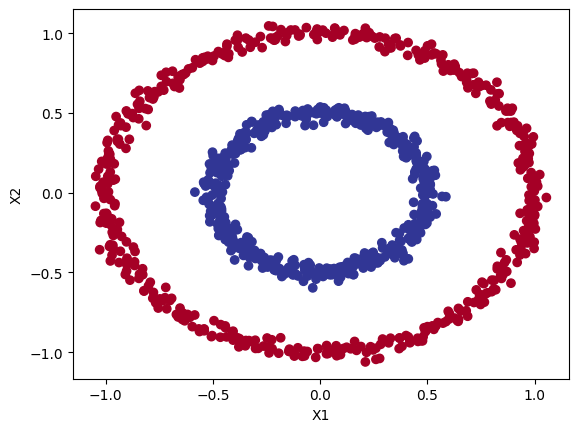

In [ ]:
#visualize with pyplot
plt.scatter(x = X_data[:, 0], y = X_data[:, 1], c=Y_data, cmap=plt.cm.RdYlBu);
plt.xlabel('X1')
plt.ylabel('X2')

In [ ]:
#ready to build the model architecture with pytorch, can now convert data to tensors
X_data = torch.from_numpy(X_data).type(torch.float)
Y_data = torch.from_numpy(Y_data).type(torch.float)

type(X_data), X_data.dtype, type(Y_data), Y_data.dtype

(torch.Tensor, torch.float32, torch.Tensor, torch.float32)

In [ ]:
#split data into training and test sets
from sklearn.model_selection import train_test_split

X_data_train, X_data_test, Y_data_train, Y_data_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)

In [ ]:
X_data_train.shape, X_data_test.shape

(torch.Size([800, 2]), torch.Size([200, 2]))

In [ ]:
#Building Neural Architecture

class NueralNet_0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=4)
    self.layer2 = nn.Linear(in_features=4, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_2(self.layer_1(x))



In [ ]:
# or using a sequential container to define layers
class NueralNet_01(nn.Module):
  def __init__(self):
    super().__init__()
    self.two_layers = nn.Sequential(nn.Linear(in_features=2, out_features = 4),
                                    nn.Linear(in_features = 4, out_features = 1)

    )
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.two_layers(x)




In [ ]:

# or also using a Sequential container to instantiate a neural network model instance
model_002 = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear (4, 1)
)

In [ ]:
# remember that without some activation function, having multiple linear layers in the network (output results, or logits which come from a sum of these linear layers)
# has the same effect as having a single linear layer because the sum of a system of linear equations is also a linear equation

In [ ]:
model_classify = NueralNet_01()

In [ ]:
model_classify.state_dict()

OrderedDict([('two_layers.0.weight',
              tensor([[ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('two_layers.0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296])),
             ('two_layers.1.weight',
              tensor([[0.3090, 0.0779, 0.4040, 0.0547]])),
             ('two_layers.1.bias', tensor([-0.1577]))])

In [ ]:
# loss function and optimizer
# BCEWithLogitsLoss expects logits as input
# BCEwithLogitsLoss is more numerically stable than using a plain Sigmoid followed by a BCELoss as, by combining the operations into one layer, we take advantage of the log-sum-exp trick for numerical stability.

criterion = nn.BCEWithLogitsLoss()
optiimizer = torch.optim.SGD(params=model_classify.parameters(), lr =0.1)



In [ ]:
#accuracy , out of all predictions, which are correct?
def accuracy(y_preds, y_true):
  cal_accuracy = (y_preds==y_true).sum().item()
  accuracy = (cal_accuracy/len(y_preds)) * 100
  return accuracy

In [ ]:
torch.manual_seed(42)
#train
model_classify.train()
train_loss_count = []
test_loss_count = []
epoch_count =[]
epochs = 1000

for epoch in range(epochs):
  #foward
  y_logits = model_classify(X_data_train).squeeze()
  y_train_preds = torch.round(torch.sigmoid(y_logits)) #turn logits to pred probabilities

  #calculate loss/accuracy
  loss_train = criterion(y_logits, Y_data_train) #BCEWithLogitsLoss expects logits as input, BCELoss expect probabilities(or simgmoid)
  train_accuracy = accuracy(y_preds = y_train_preds, y_true=Y_data_train)

  #zer0_grad
  optimizer.zero_grad()

  #backpropagate
  loss_train.backward()

  #update gradients
  optimizer.step()
  train_loss_count.append(loss_train)
  epoch_count.append(epoch)

  #evaluate on test data each epoch
  model_classify.eval()
  with torch.inference_mode():
    test_logits = model_classify(X_data_test).squeeze()
    y_test_preds = torch.round(torch.sigmoid(test_logits))

    loss_test = criterion(test_logits, Y_data_test)
    test_accuracy = accuracy(y_preds = y_test_preds, y_true = Y_data_test)
    test_loss_count.append(loss_test)











train accuracy: 49.875
test accuracy: 50.5


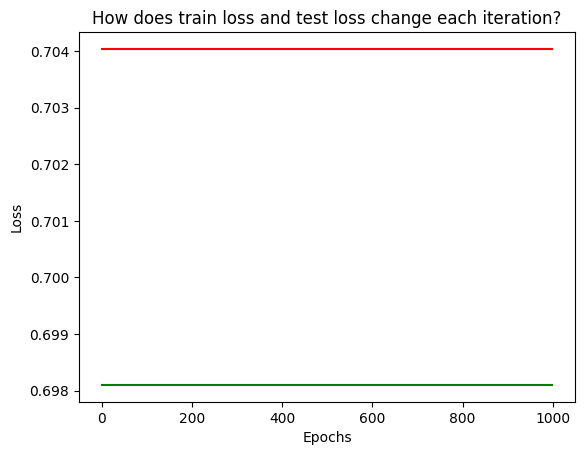

In [ ]:
#evaluate
model_classify.eval()
with torch.inference_mode():

  print(f"train accuracy: {train_accuracy}")
  print(f"test accuracy: {test_accuracy}")

  plt.plot(epoch_count, train_loss_count, c='r' )
  plt.plot(epoch_count, test_loss_count, c='g' )
  plt.title('How does train loss and test loss change each iteration?')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')

In [ ]:
#plot decision boundary to see what is happening with training and test

import requests
from pathlib import Path

#Download if not available
if Path("helper_functions.py").is_file():
  print("file already exists, skipping Download")
else:
  print("Downloading helper functions")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)




file already exists, skipping Download


In [ ]:
import helper_functions
from helper_functions import plot_decision_boundary

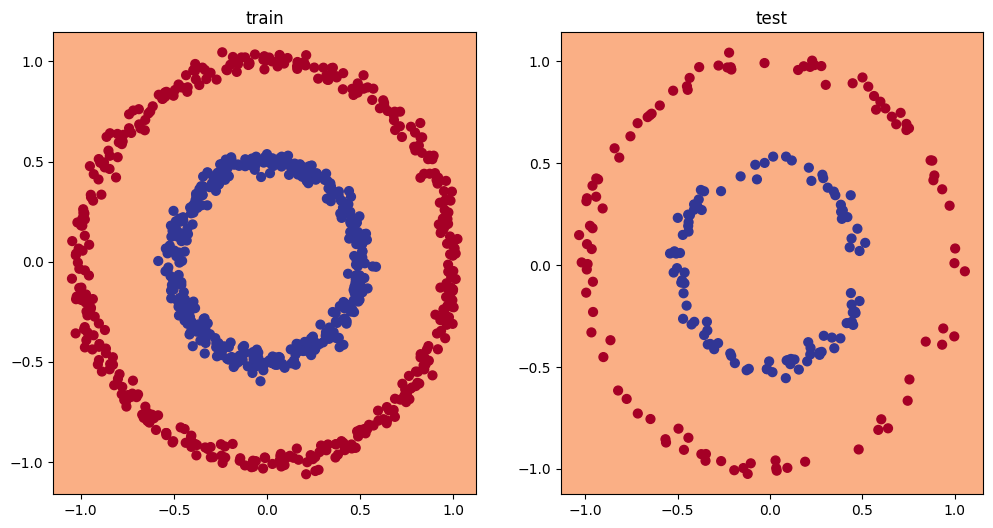

In [ ]:
#plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_classify, X_data_train, Y_data_train)


plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_classify, X_data_test, Y_data_test)


In [ ]:
#SOME OBSERVATIONS

#noticed that increasing the number of epochs or changing the learning rate does not improve the model
#this maybe because the model is a linear equation or sum of linear equations(which has the same effect as a single linear layer) and that the data is not linearly separable
# I can now improve the model from the model perspective by maybe
# -adding more hidden layers
# -adding more hidden units
# -changing the learning rate
# -applying activation functions
# -changing the loss fucntion
# -changing the optimizer

In [ ]:
#always put model and data on the same device
#numpy uses cpu and not gpu

In [ ]:
#introducing non_linearity, using the ReLU()

class NeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=4)
    self.layer_2 = nn.Linear(in_features = 4, out_features =1)
    self.relu = nn.ReLU()

  def forward(self, x: torch.Tensor)-> torch.Tensor:
    return self.layer_2(self.relu(self.layer_1(x)))



#or using sequential container as

class NeuralNet_Sequential(nn.Module):
  def __init__(self):
    super().__init__()
    self.network_architecture = nn.Sequential(nn.Linear(in_features=2, out_features=4),
                                              nn.ReLU(),
                                              nn.Linear(in_features=4, out_features=1),
    )

  def forward(self, x: torch.Tensor)-> torch.Tensor:
    return self.network_architecture(x)



In [ ]:
#using Sequential container to instantiate a model
model_classify_with_relu = nn.Sequential(nn.Linear(in_features=2, out_features=4),
                                nn.ReLU(),
                                nn.Linear(in_features = 4, out_features =1)


)

In [ ]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_classify_with_relu.parameters(), lr = 0.1)

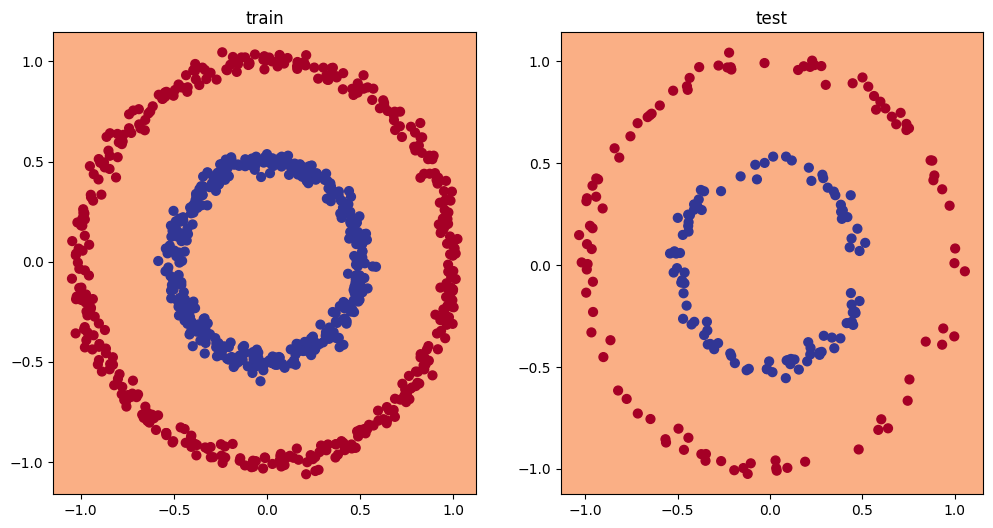

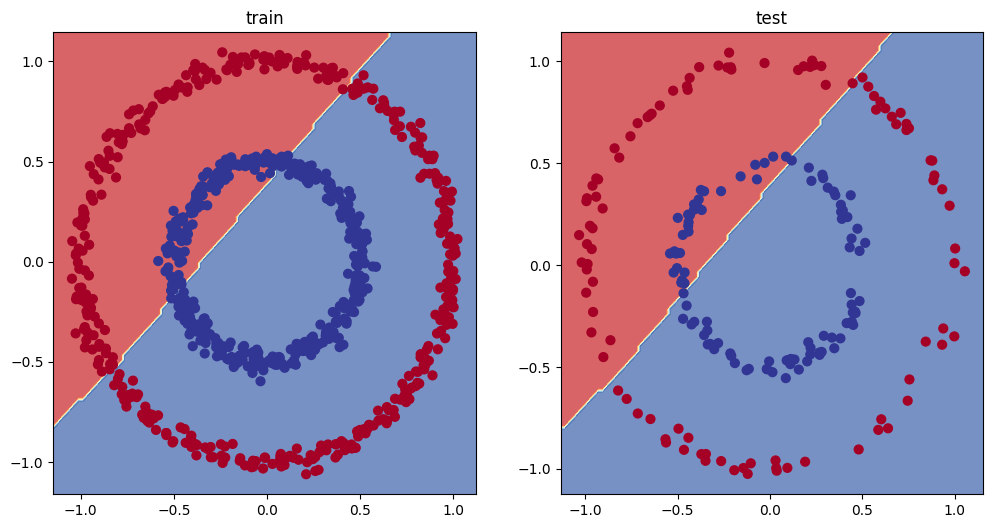

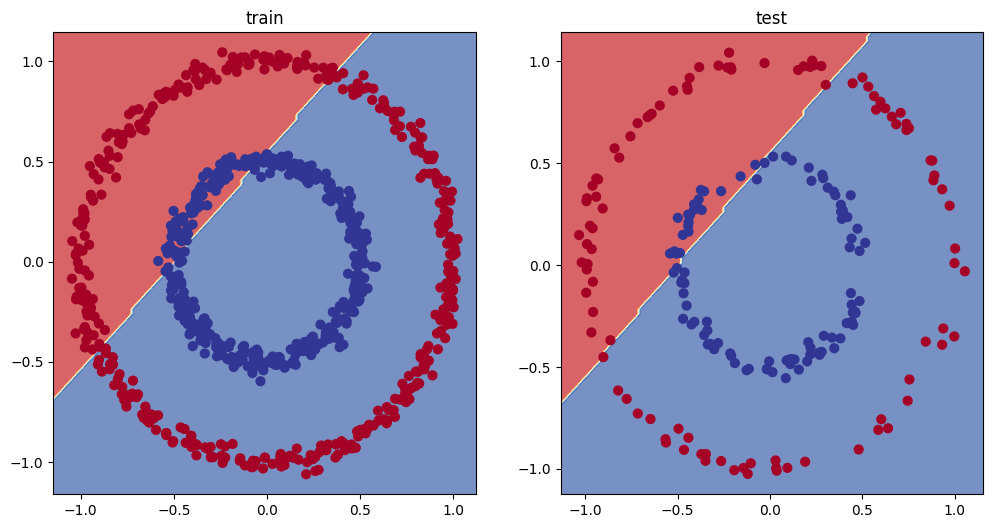

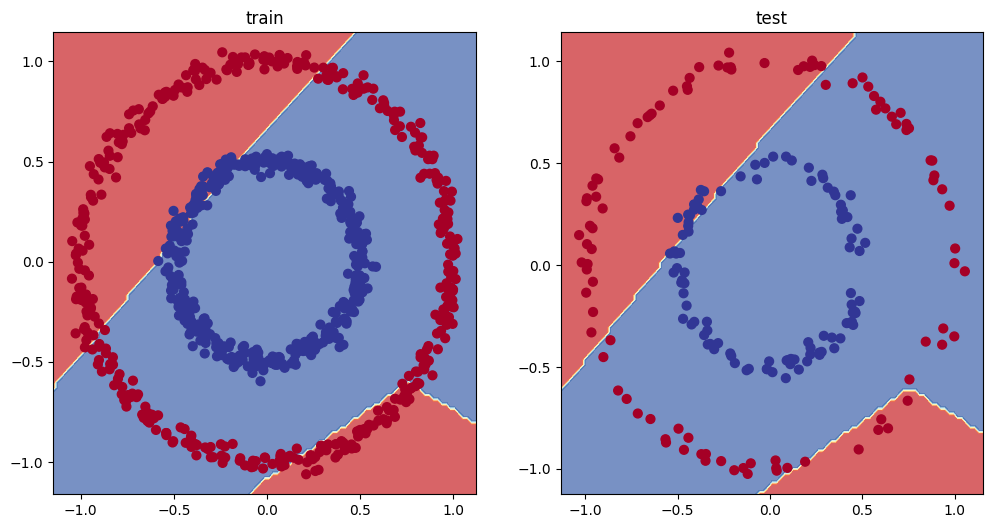

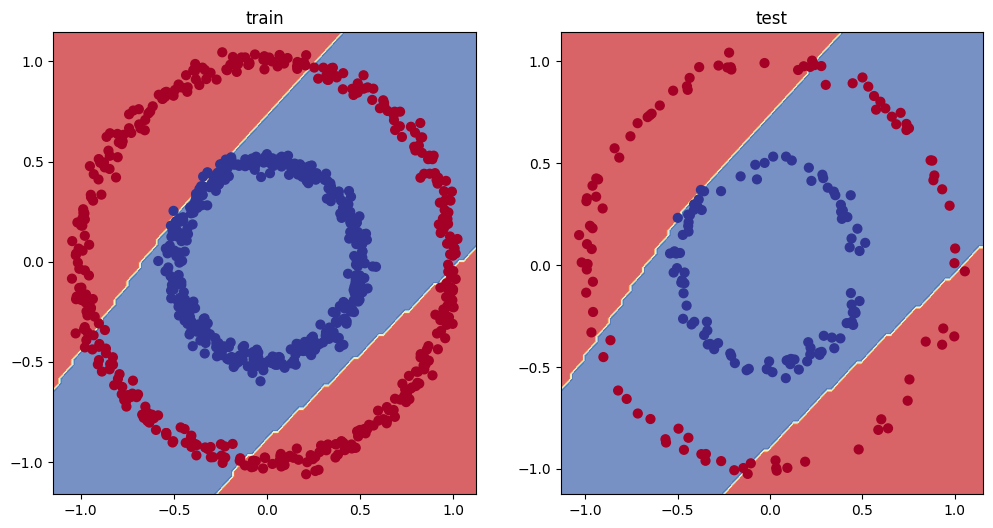

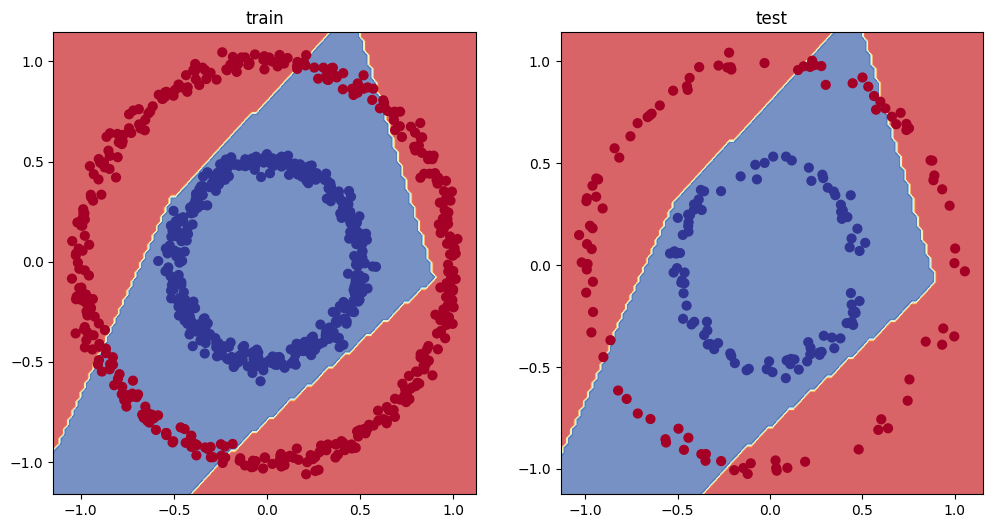

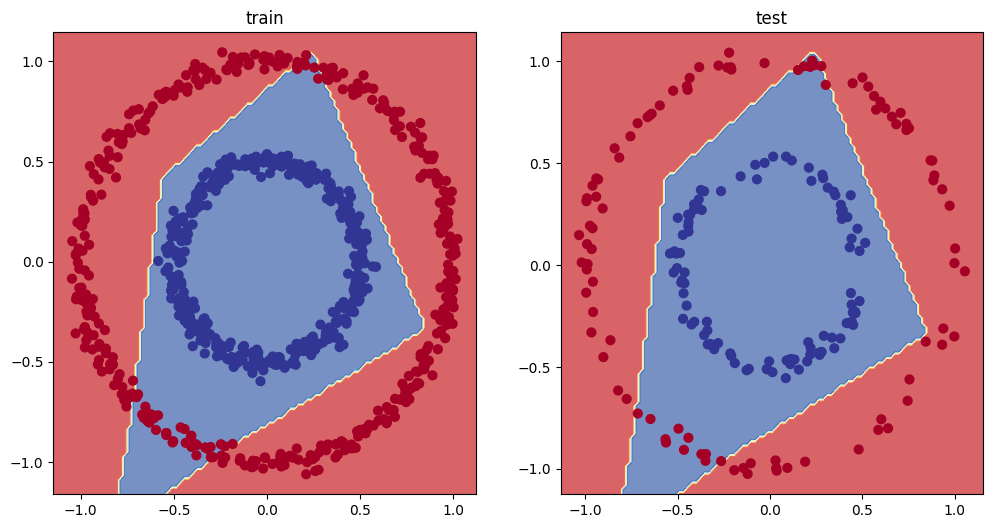

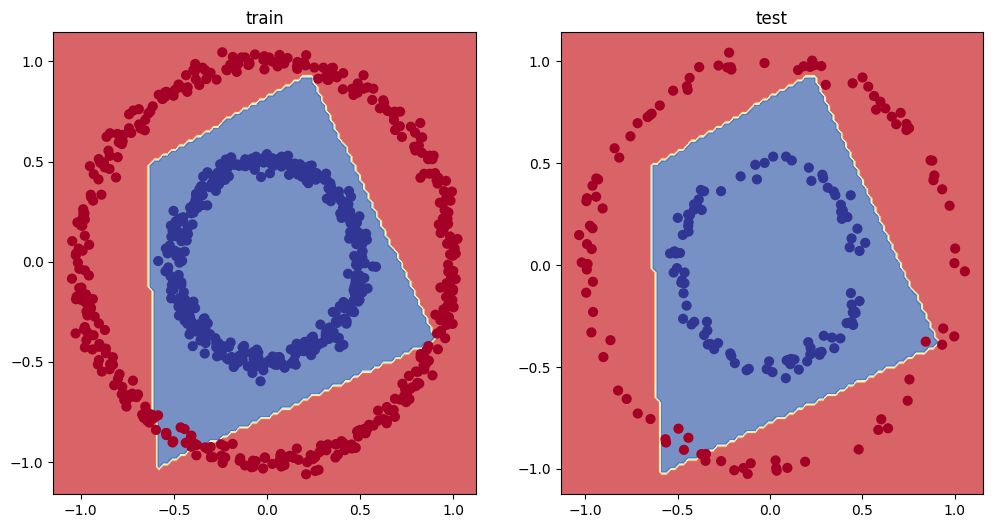

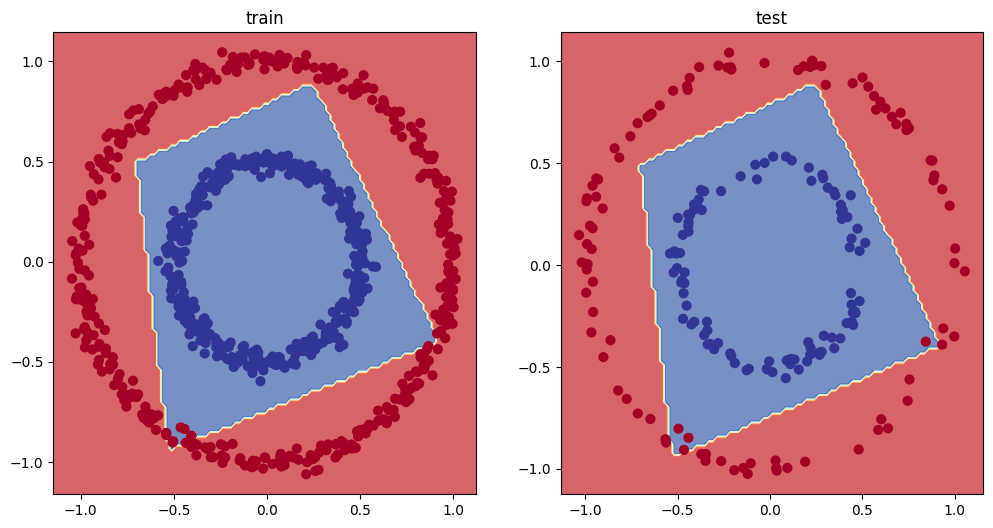

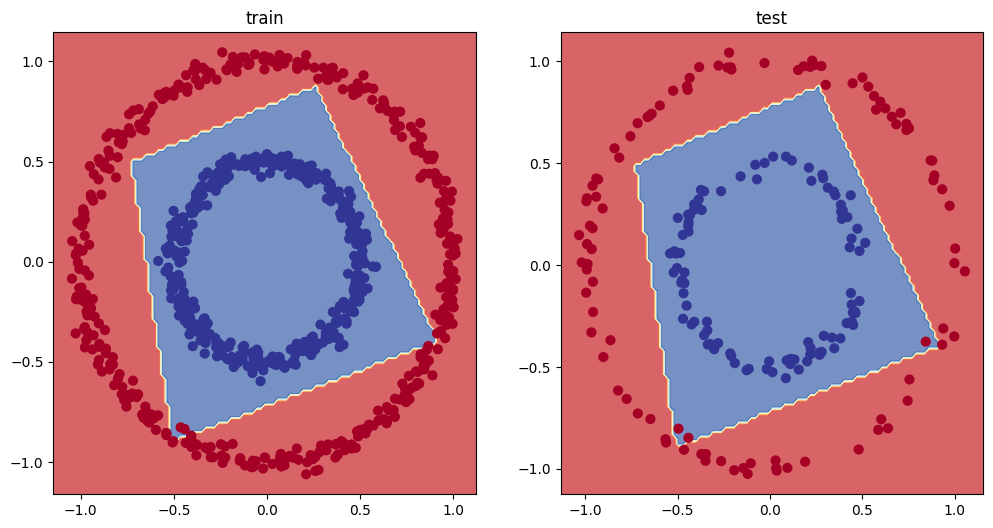

In [ ]:
torch.manual_seed(42)
model_classify_with_relu.train()


train_loss_count = []
test_loss_count = []
epoch_count =[]

epochs = 2000
for epoch in range (epochs):
  y_train_logits = model_classify_with_relu(X_data_train).squeeze()
  y_train_preds = torch.round(torch.sigmoid(y_train_logits))

  train_loss = criterion(y_train_logits, Y_data_train)
  train_accuracy = accuracy(y_train_preds, Y_data_train)

  optimizer.zero_grad()

  train_loss.backward()

  optimizer.step()

  train_loss_count.append(train_loss)
  epoch_count.append(epoch)

  model_classify_with_relu.eval()
  with torch.inference_mode():

    y_test_logits = model_classify_with_relu(X_data_test).squeeze()
    y_test_preds =torch.round(torch.sigmoid(y_test_logits))

    test_loss = criterion(y_test_logits, Y_data_test)
    test_loss_count.append(test_loss)
    test_accuracy = accuracy(y_test_preds, Y_data_test)

    #plot decision boundary every now and then
    if epoch % 200==0:
      plt.figure(figsize=(12,6))
      plt.subplot(1,2,1)
      plt.title("train")
      plot_decision_boundary(model_classify_with_relu, X_data_train, Y_data_train)


      plt.subplot(1,2,2)
      plt.title("test")
      plot_decision_boundary(model_classify_with_relu, X_data_test, Y_data_test)





train accuracy: 99.75
test accuracy: 98.5


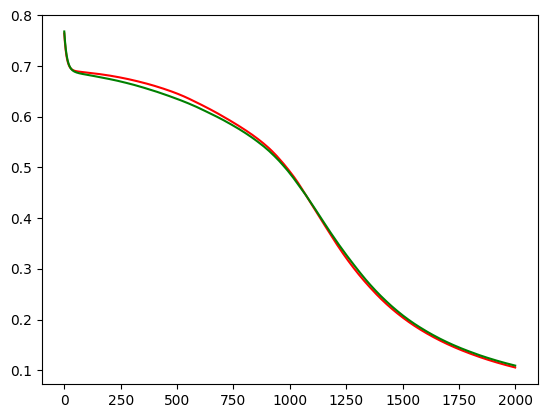

In [ ]:
model_classify_with_relu.eval()
with torch.inference_mode():

  print(f"train accuracy: {train_accuracy}")
  print(f"test accuracy: {test_accuracy}")

  plt.plot(epoch_count, train_loss_count, c='r' )
  plt.plot(epoch_count, test_loss_count, c='g' )


In [ ]:
# we notice that the first few hundred iterations gives an accuracy of about the same as using the linear layer without ReLU() about 50% in both train and test
# more iterations enable the model learn more non linear features bringing accuracy close to 100%
# it is interesting to see that introducing a non-linear activation layer changed the capability of the model
# overfitting???? One may argue that for data (with no or little covariance shift from traing data) that is data with the same or close distribution to the training data distribution (or data with  the same patterns) the model will perform particularly well

In [ ]:
optimizer.state_dict()

{'state': {0: {'momentum_buffer': None},
  1: {'momentum_buffer': None},
  2: {'momentum_buffer': None},
  3: {'momentum_buffer': None}},
 'param_groups': [{'lr': 0.1,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'fused': None,
   'params': [0, 1, 2, 3]}]}

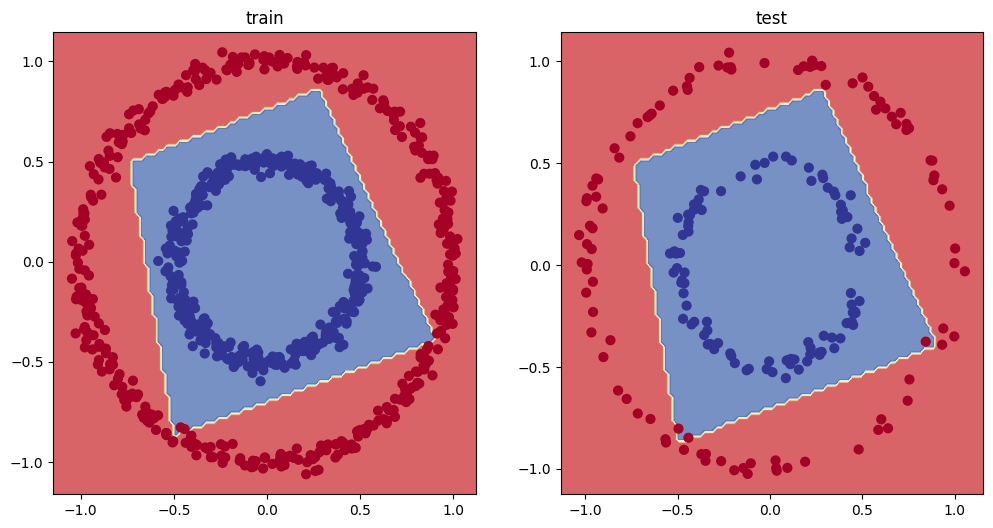

In [ ]:
#plot final decision boundaries to see the final picture
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_classify_with_relu, X_data_train, Y_data_train)


plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_classify_with_relu, X_data_test, Y_data_test)

In [ ]:
#practicing some python list comprehension
#instead of
count =0
for i in Y_data:
  if i.item() == 1:
    count = count + 1
print(f"{count}/{len(Y_data)}")

500/1000


In [ ]:
#do
print(f"{sum(1 for i in Y_data if i.item() == 1)}/{len(Y_data)}")


500/1000


In [ ]:
#See that the class labels, 0 and 1, are equally distributed and not skewed, so that the measure of accuracy is valid

In [ ]:
#Lets build a deeper neural network
model_deep_classify = nn.Sequential(nn.Linear(in_features=2, out_features=4),
                                nn.ReLU(),
                                nn.Linear(in_features = 4, out_features = 16),
                                nn.ReLU(),
                                nn.Linear(in_features = 16, out_features =8),
                                nn.ReLU(),
                                nn.Linear(in_features = 8, out_features =4),
                                nn.ReLU(),

                                nn.Linear(in_features = 4, out_features =1)


)

In [ ]:
criterion_01 = nn.BCEWithLogitsLoss()
optimizer_01 = torch.optim.SGD(params=model_deep_classify.parameters(), lr = 0.1)

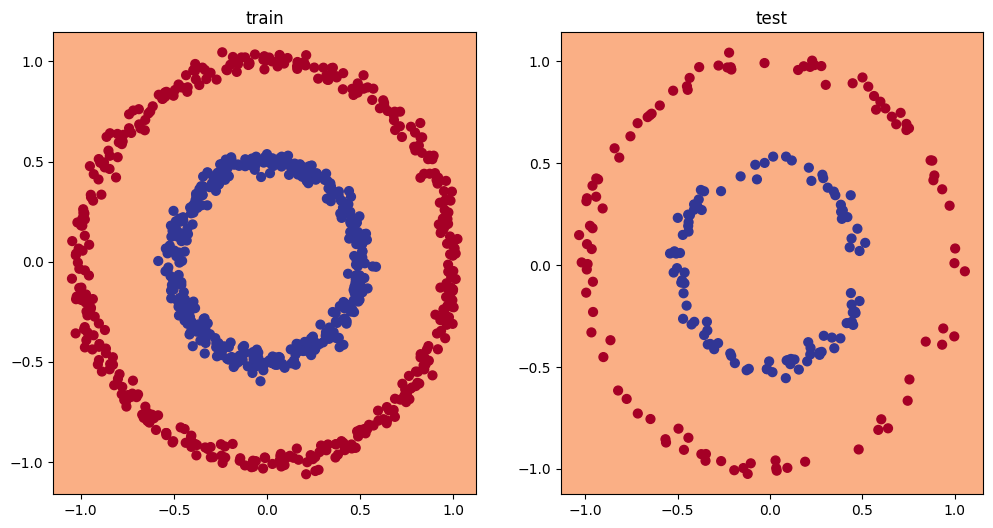

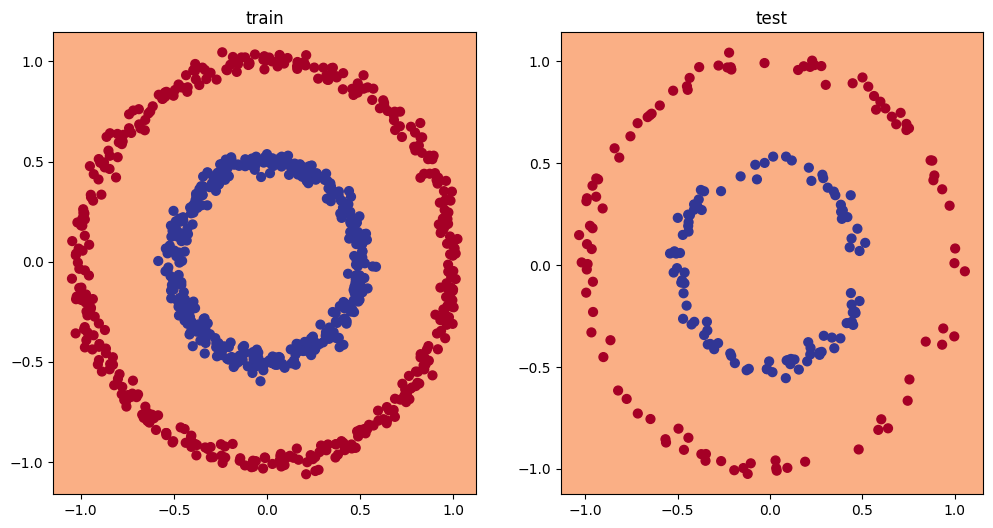

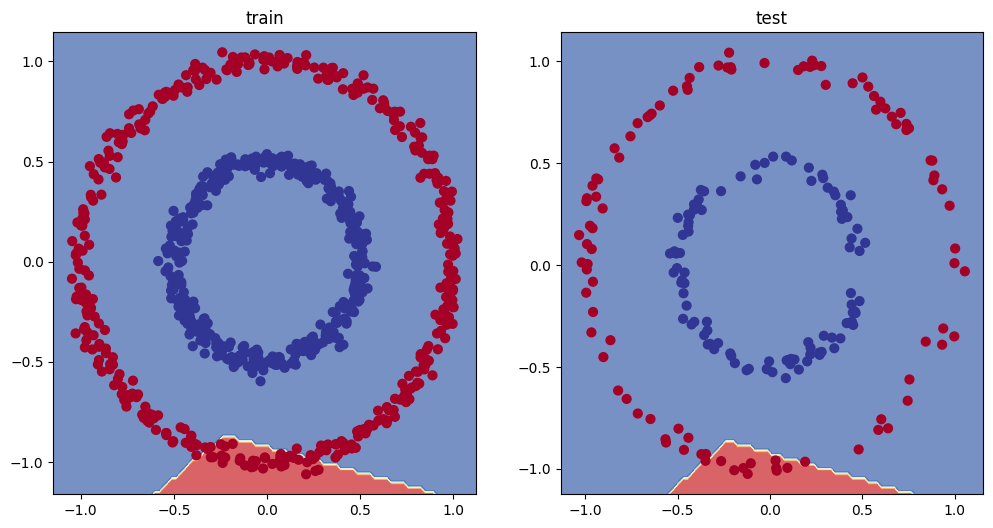

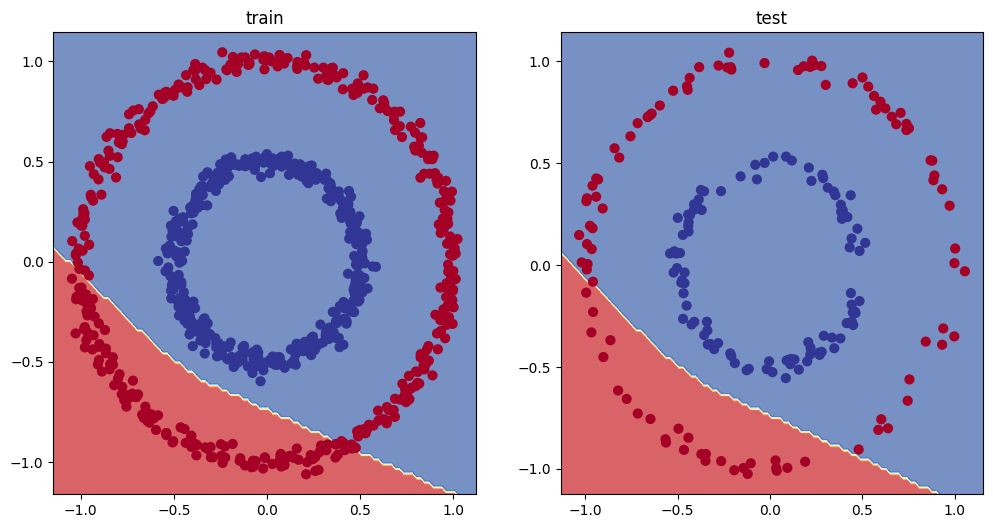

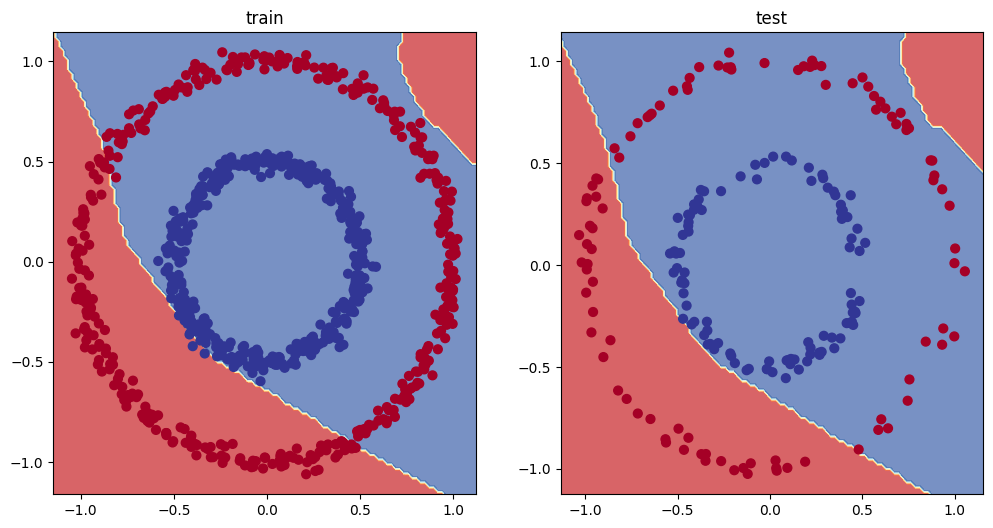

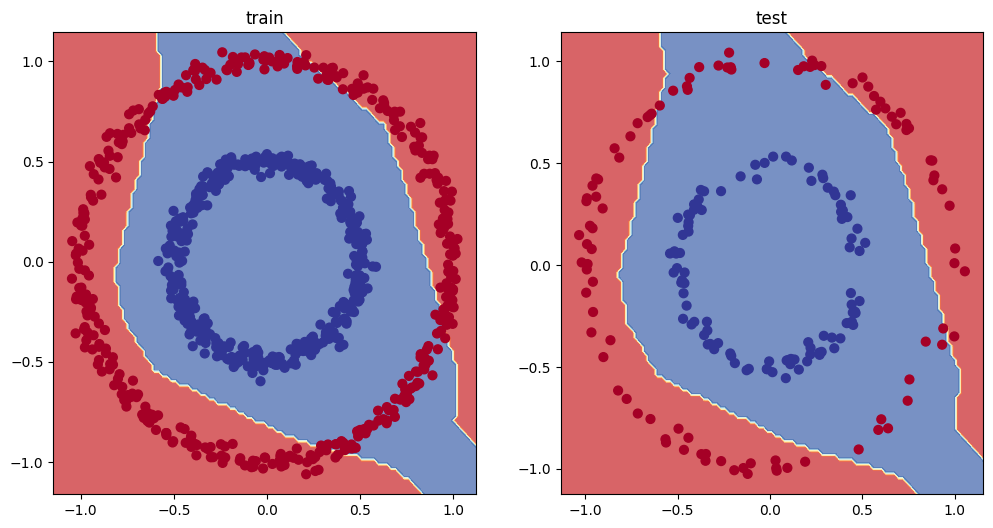

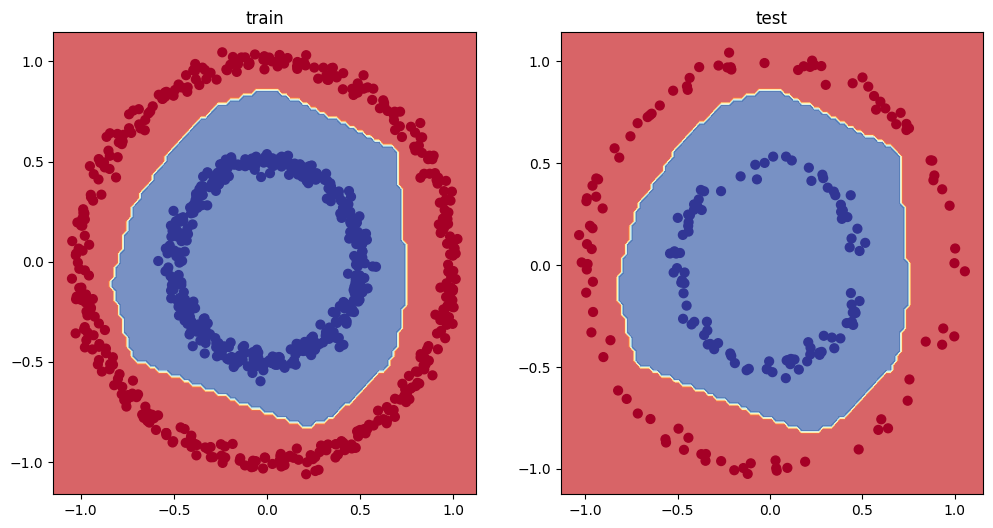

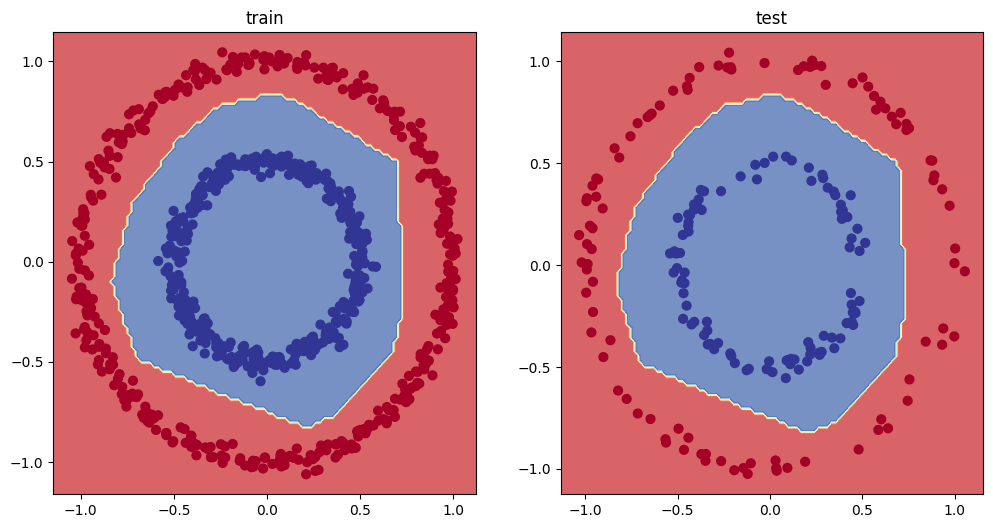

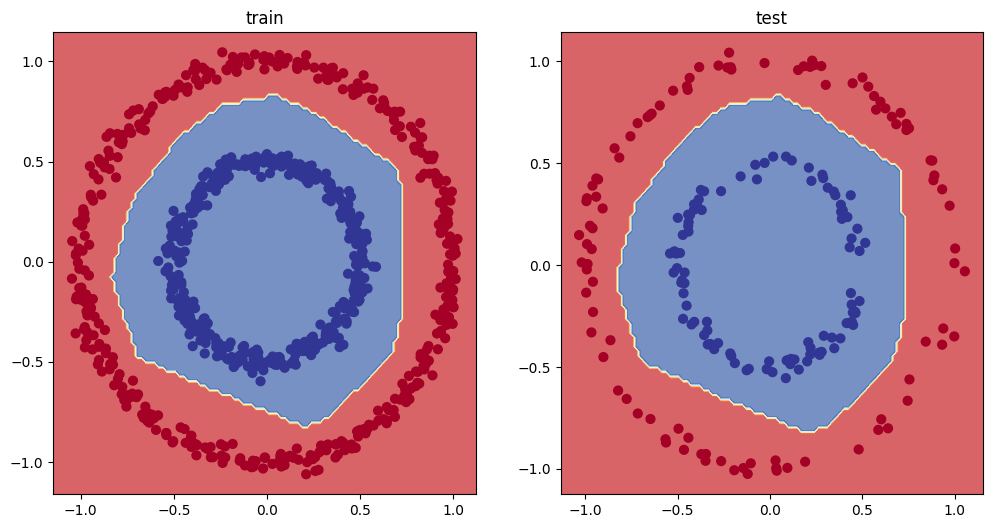

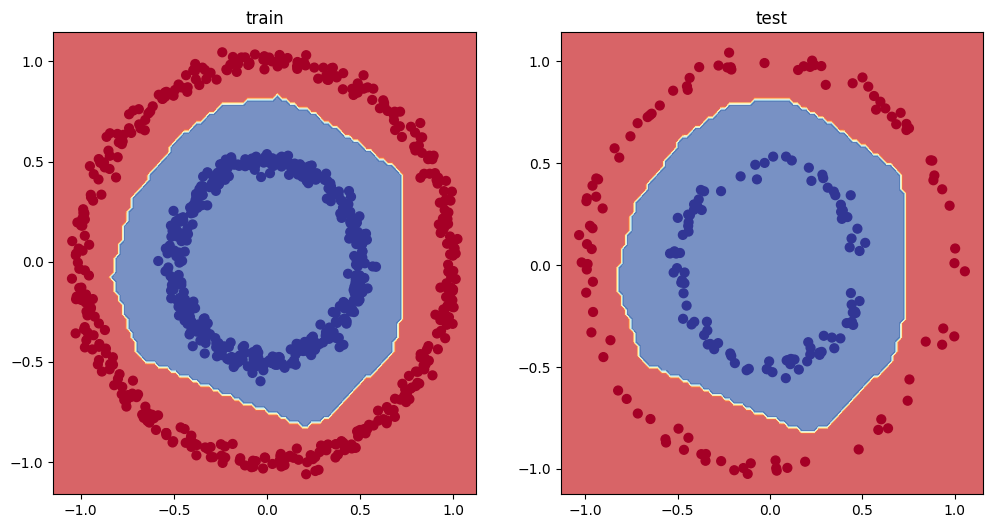

In [ ]:
torch.manual_seed(42)
model_deep_classify.train()


train_loss_count = []
test_loss_count = []
epoch_count =[]

epochs = 2000
for epoch in range (epochs):
  y_train_logits_01 = model_deep_classify(X_data_train).squeeze()
  y_train_preds_01 = torch.round(torch.sigmoid(y_train_logits_01))

  train_loss_01 = criterion_01(y_train_logits_01, Y_data_train)
  train_accuracy = accuracy(y_train_preds_01, Y_data_train)

  optimizer_01.zero_grad()

  train_loss_01.backward()

  optimizer_01.step()

  train_loss_count.append(train_loss_01)
  epoch_count.append(epoch)

  model_deep_classify.eval()
  with torch.inference_mode():

    y_test_logits_01 = model_deep_classify(X_data_test).squeeze()
    y_test_preds_01 =torch.round(torch.sigmoid(y_test_logits_01))

    test_loss = criterion_01(y_test_logits_01, Y_data_test)
    test_loss_count.append(test_loss)
    test_accuracy = accuracy(y_test_preds_01, Y_data_test)


    if epoch % 200==0:
      plt.figure(figsize=(12,6))
      plt.subplot(1,2,1)
      plt.title("train")
      plot_decision_boundary(model_deep_classify, X_data_train, Y_data_train)


      plt.subplot(1,2,2)
      plt.title("test")
      plot_decision_boundary(model_deep_classify, X_data_test, Y_data_test)

train accuracy: 100.0
test accuracy: 100.0


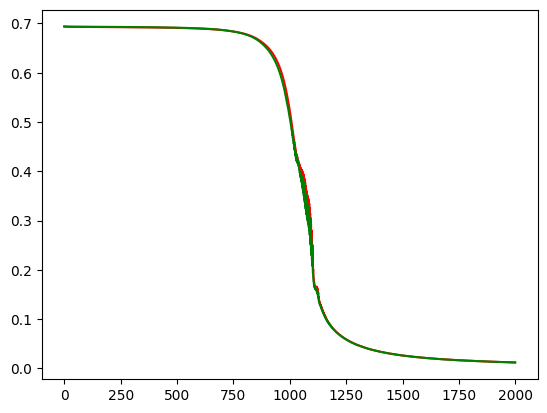

In [ ]:
model_deep_classify.eval()
with torch.inference_mode():

  print(f"train accuracy: {train_accuracy}")
  print(f"test accuracy: {test_accuracy}")

  plt.plot(epoch_count, train_loss_count, c='r' )
  plt.plot(epoch_count, test_loss_count, c='g' )

In [ ]:
#changing the neural network to a deeper neural net enable it to find more features earlier with each pass, although the accuracy is almost the same as in the case of a neural net, the decision boundary is more intuitive
#thus there are different views for accuracy, different meaning and picture of 100%

NEXT>>>>>>>>

NEXT>>>>>>>>>

In [ ]:
#LETS MOVE TO MULTI_CLASS CLASSIFICATION
# A distinct characteristic of this architecture is that the logits(linear predictions) pass through a softmax layer(torch.softmax)
# the loss function is also appropriately the cross entropy loss


In [ ]:
#Prepare Data
from sklearn.datasets import make_blobs

N=1000
dataset = make_blobs(n_samples=N, random_state=3, n_features=2, centers=4)

In [ ]:
X_blob, Y_blob = dataset

In [ ]:
X_blob.shape, Y_blob.shape, X_blob.dtype, Y_blob.dtype, type(X_blob), type(Y_blob)

((1000, 2),
 (1000,),
 dtype('float64'),
 dtype('int64'),
 numpy.ndarray,
 numpy.ndarray)

In [ ]:
#pandas DataFrame
import pandas as pd
pd = pd.DataFrame({"X1": X_blob[:, 0], "X2": X_blob[:,1], "label": Y_blob})
pd.head(10)

X1        X2  label
0 -3.430863 -1.360559      1
1 -5.966165  1.416144      1
2  8.284718  7.544570      2
3  0.428738  6.073783      0
4 -5.259775  0.974916      1
5 -5.789321 -7.314552      3
6 -6.036041 -7.058922      3
7  7.269848  7.930628      2
8 -4.054610  2.410315      1
9 -4.570239  1.201978      1

In [ ]:
#are the classes skewed or nearly equally distributed?
a, b, c, d = sum(1 for i in Y_blob if i==0), sum(1 for i in Y_blob if i==1) , sum(1 for i in Y_blob if i==2), sum(1 for i in Y_blob if i==3)
a, b, c, d


(250, 250, 250, 250)

Text(0, 0.5, 'X2')

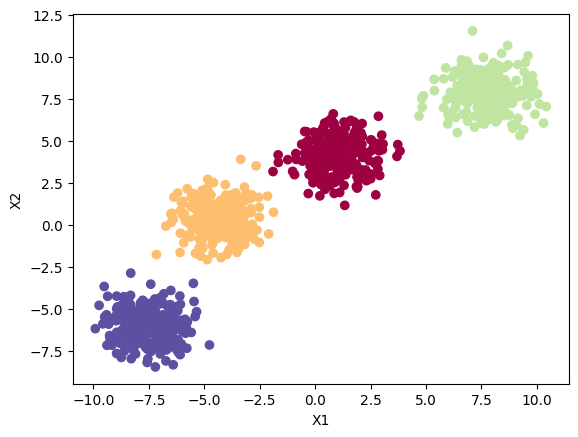

In [ ]:
#visualize data on scatter plot
plt.scatter(x= X_blob[:,0], y= X_blob[:, 1], c=Y_blob, cmap = plt.cm.Spectral)
plt.xlabel('X1')
plt.ylabel('X2')

In [ ]:
#looking good, lets convert our data to tensors for pytorch
X_blob, Y_blob = torch.from_numpy(X_blob).type(torch.float), torch.from_numpy(Y_blob).type(torch.float)

In [ ]:
X_blob.dtype, Y_blob.dtype, type(X_blob), type(Y_blob)

(torch.float32, torch.float32, torch.Tensor, torch.Tensor)

In [ ]:
#get train and test sets
from sklearn.model_selection import train_test_split
X_blob_train, X_blob_test, Y_blob_train, Y_blob_test = train_test_split(X_blob, Y_blob, test_size =0.2, random_state = 42,)

In [ ]:
X_blob_train.shape, Y_blob_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [ ]:
#can now proceed to build a neural network to try to classify these four groups of labels
#we use a softmax to transform the linear predictions(or logits) from the model instead of sigmoid(which outputs values between 0 and 1 for binary classification)
#we use cross entopy loss or the loss function instead of binary cross entropy loss
#go! go! go!

In [ ]:
class MultiClassifier(nn.Module):
  def __init__(self):
    super(). __init__()
    self.layer_architecture = nn.Sequential(nn.Linear(2,16),
                                            nn.ReLU(),
                                            nn.Linear(16, 8),
                                            nn.ReLU(),
                                            nn.Linear(8, 4)

    )
    def forward(self, x: torch.Tensor)->torch.Tensor:
      return self.layer_architecture(x)

In [ ]:
#Instantly, we can use a simpler network
model_multi_class =  nn.Sequential(nn.Linear(2,4),
                                            nn.ReLU(),
                                            nn.Linear(4, 8),
                                            nn.ReLU(),
                                            nn.Linear(8, 4)
                        )


In [ ]:
model_multi_class.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153]])),
             ('0.bias', tensor([ 0.6233, -0.5188,  0.6146,  0.1323])),
             ('2.weight',
              tensor([[ 0.3694,  0.0677,  0.2411, -0.0706],
                      [ 0.3854,  0.0739, -0.2334,  0.1274],
                      [-0.2304, -0.0586, -0.2031,  0.3317],
                      [-0.3947, -0.2305, -0.1412, -0.3006],
                      [ 0.0472, -0.4938,  0.4516, -0.4247],
                      [ 0.3860,  0.0832, -0.1624,  0.3090],
                      [ 0.0779,  0.4040,  0.0547, -0.1577],
                      [ 0.1343, -0.1356,  0.2104,  0.4464]])),
             ('2.bias',
              tensor([ 0.2890, -0.2186,  0.2886,  0.0895,  0.2539, -0.3048, -0.4950, -0.1932])),
             ('4.weight',
              tensor([[-0.2712,  0.2901,  0.1018,  0.1464,  0.1118, -0.0062,

In [ ]:
#pedict with the initial random model state
Y_blob_logits = model_multi_class(X_blob_train).squeeze()
Y_blob_preds = torch.softmax(Y_blob_logits, dim=1).argmax(dim=1)
Y_blob_preds

tensor([0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2,
        0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2,
        2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2,
        0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2,
        2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
        0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
        2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0,
        0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0,
        0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0,
        0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2,
        0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0,
        0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2,
        2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2,

In [ ]:
#loss and optimizer
criterion = nn.CrossEntropyLoss() #Note that this case is equivalent to applying LogSoftmax on the logits, followed by NLLLoss.
optimizer = torch.optim.SGD(params=model_multi_class.parameters(), lr =0.1)

In [ ]:
#what would the output from the model look like?
with torch.inference_mode():
  logits = model_multi_class(X_blob_train)
  some_preds = torch.softmax(logits[:2], dim=1)
some_preds, logits.shape

(tensor(2.), torch.Size([800, 4]))

In [ ]:
#its returns a set of results for each class for each example input, which can be transformed to class probabilities with softmax

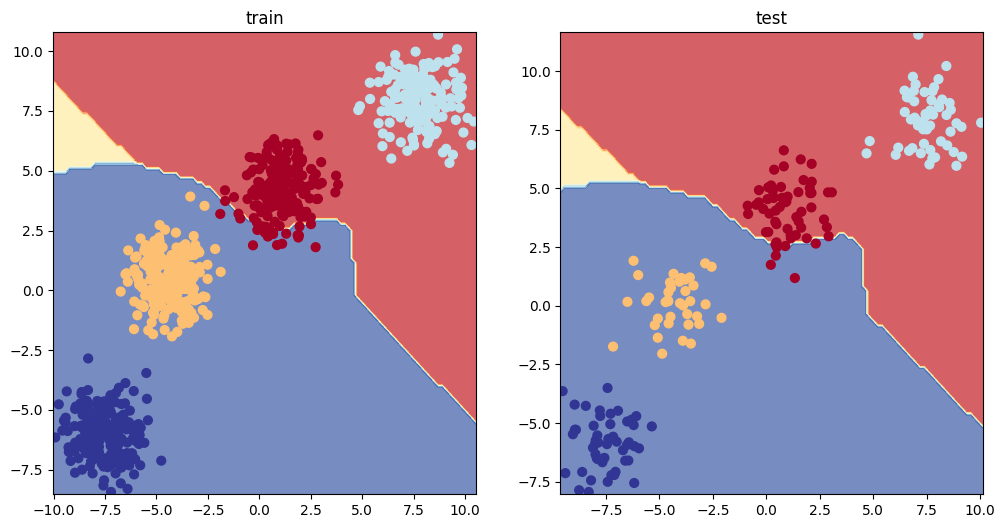

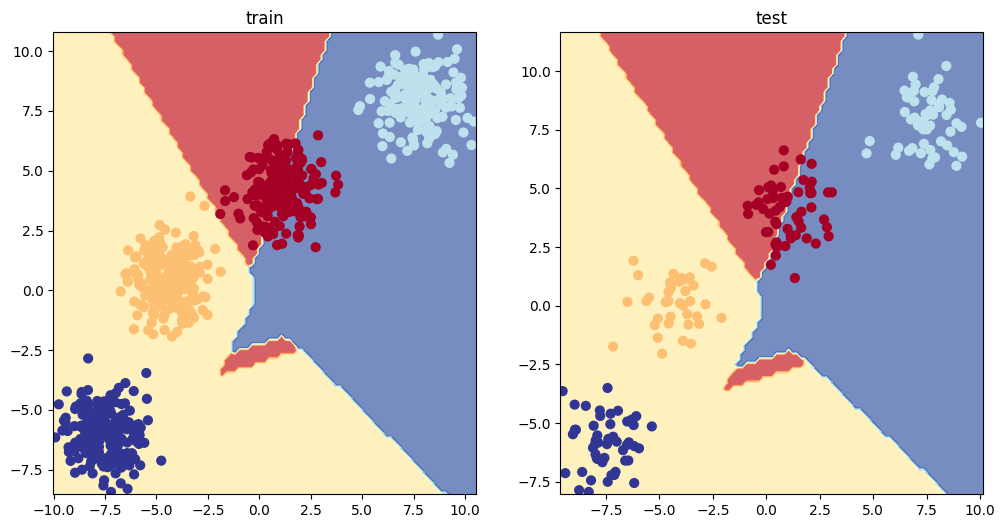

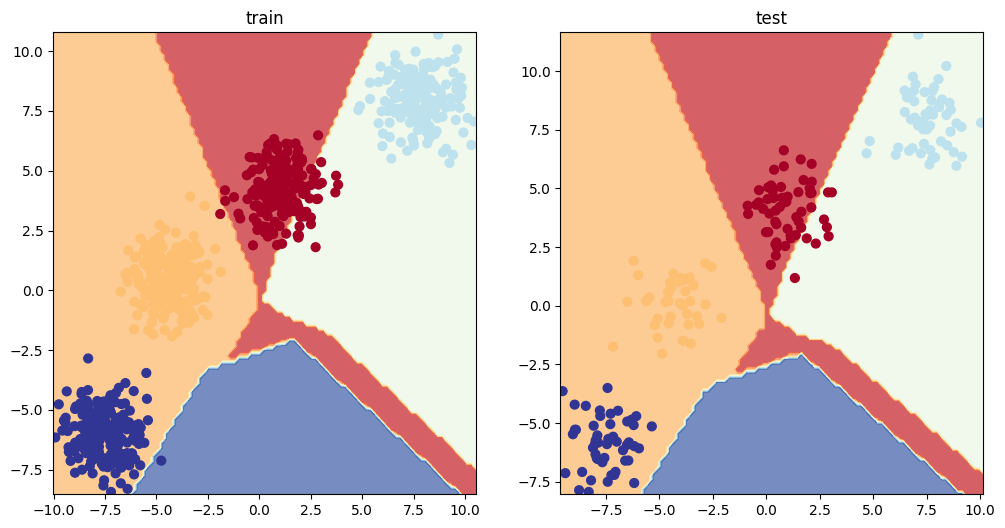

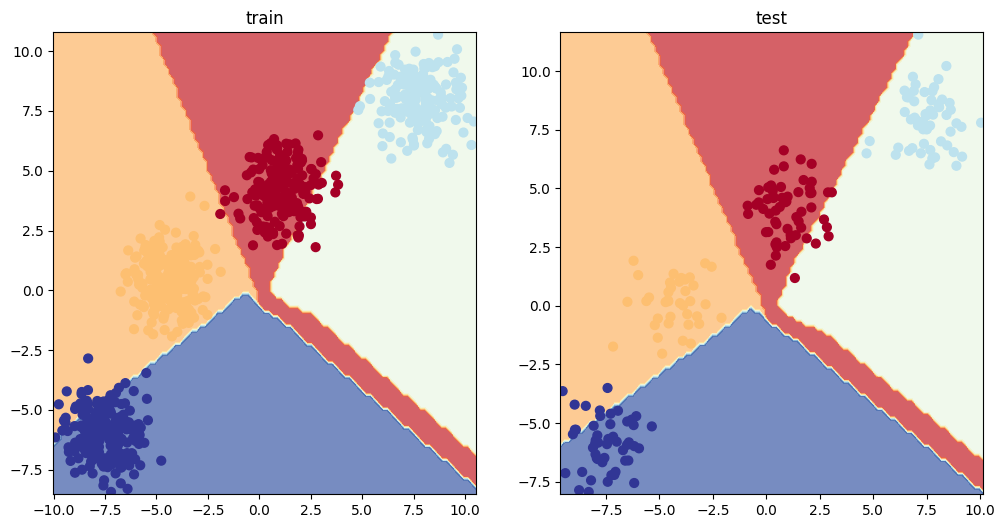

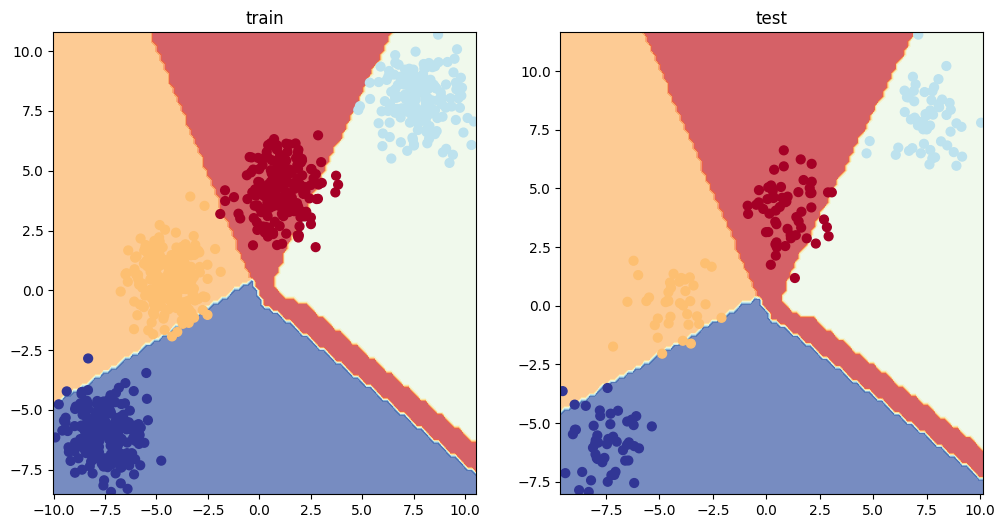

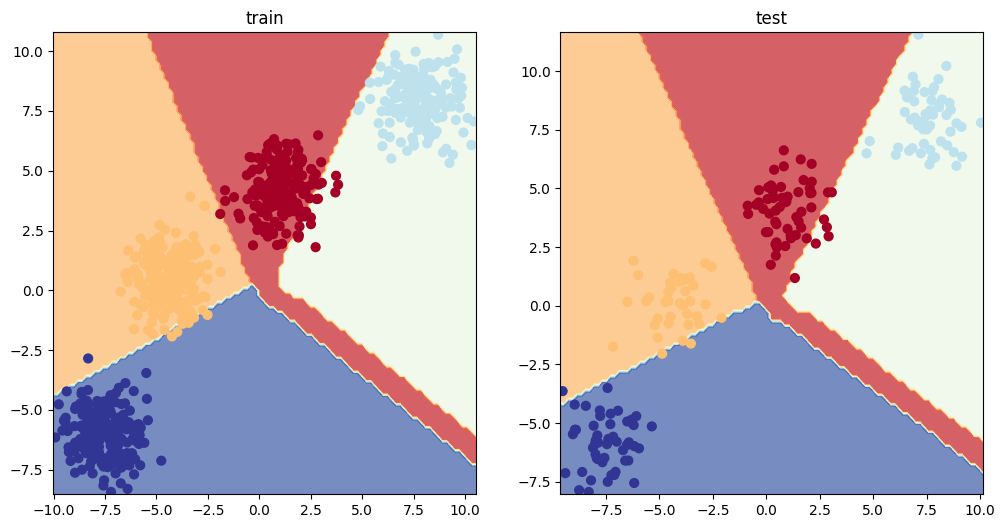

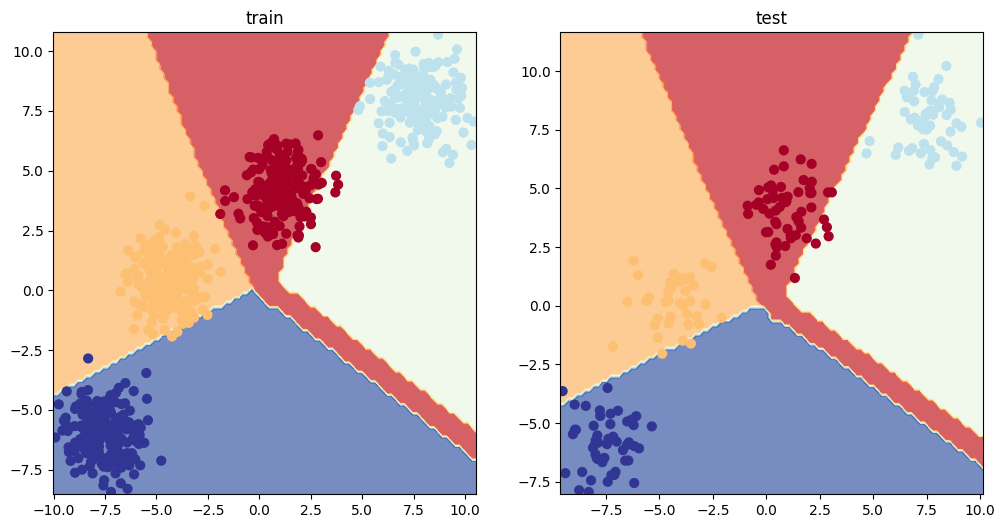

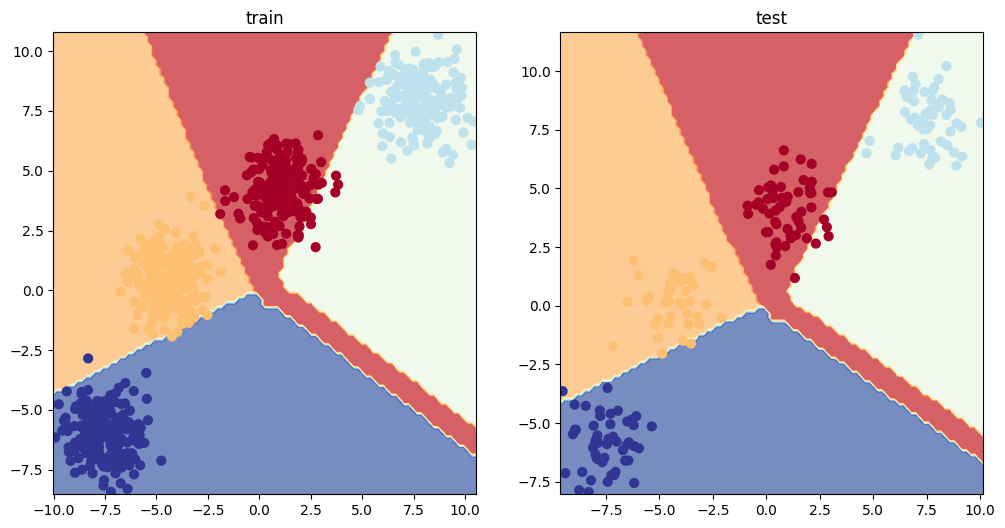

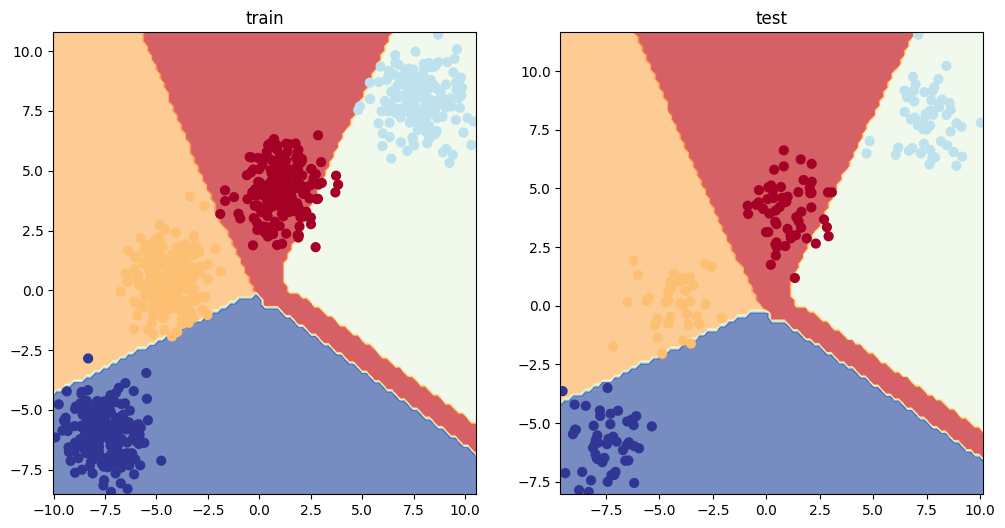

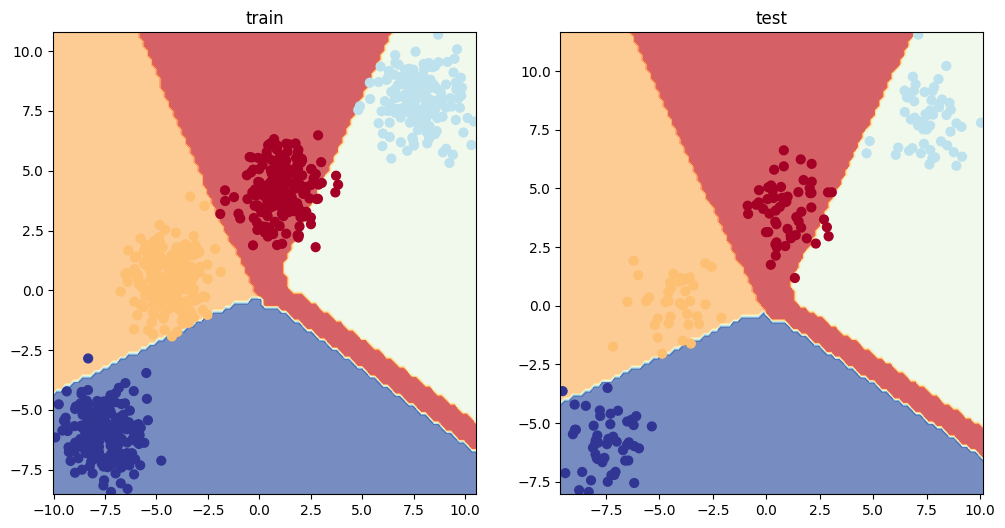

In [ ]:
#train
torch.manual_seed(42)
model_multi_class.train()

train_loss_count = []
test_loss_count = []
loss_count = []
epoch_count = []
epochs = 200

for epoch in range(epochs):

  #foward
  Y_blob_logits = model_multi_class(X_blob_train)
  Y_blob_preds = torch.softmax(Y_blob_logits, dim=1).argmax(dim=1)
  train_accuracy = accuracy(Y_blob_preds, Y_blob_train)

  #target must be of torch.long dtype
  Y_blob_train = Y_blob_train.type(torch.long)
  train_loss = criterion(Y_blob_logits, Y_blob_train)

  #zero_grad
  optimizer.zero_grad()

  #calculate gradients
  train_loss.backward()

  #gradient update
  optimizer.step()

  train_loss_count.append(train_loss)
  epoch_count.append(epoch)

  #evaluate
  model_multi_class.eval()

  with torch.inference_mode():
    Y_test_logits = model_multi_class(X_blob_test)
    Y_test_preds = torch.softmax(Y_test_logits, dim=1).argmax(dim=1)
    test_accuracy = accuracy(Y_test_preds, Y_blob_test)

    Y_blob_test = Y_blob_test.type(torch.long)
    test_loss = criterion(Y_test_logits, Y_blob_test)

    test_loss_count.append(test_loss)

    if epoch % 20==0:
      plt.figure(figsize=(12,6))
      plt.subplot(1,2,1)
      plt.title("train")
      plot_decision_boundary(model_multi_class, X_blob_train, Y_blob_train)


      plt.subplot(1,2,2)
      plt.title("test")
      plot_decision_boundary(model_multi_class, X_blob_test, Y_blob_test)


In [ ]:
#because the classes are balanced and not skewed, we can get away with using crossEntropyLoss without assigning weights to the classes and,
#also get away with this measure of accuracy
#with skewed classes, we may need to assign weights to the classes, and use a different accuracy measurement such as precision, recall, F1Score , confusin matrix, classification report

#!pip install torchmetrics
#torchmetrics.Accuracy(), torchmetrics.Precision(), torchmetrics.Recall(), torchmetrics.F1Score(), torchmetrics.ConfusionMatrix()
#sklearn.metrics.accuracy_score, sklearn.metrics.precision_score(), sklearn.metrics.recall_score(), sklearn.metrics.f1_score()

In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 10.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
#metrics from torchmetrics
from torchmetrics import Accuracy
metric = Accuracy(task='multiclass', num_classes=4)

In [ ]:
model_multi_class.eval()
with torch.inference_mode():
  print(f"train accuracy: {metric(Y_blob_preds, Y_blob_train)}")
  print(f"test accuracy: {metric(Y_test_preds, Y_blob_test)}")

train accuracy: 0.9850000143051147
test accuracy: 0.9649999737739563


train accuracy: 98.5
test accuracy: 96.5


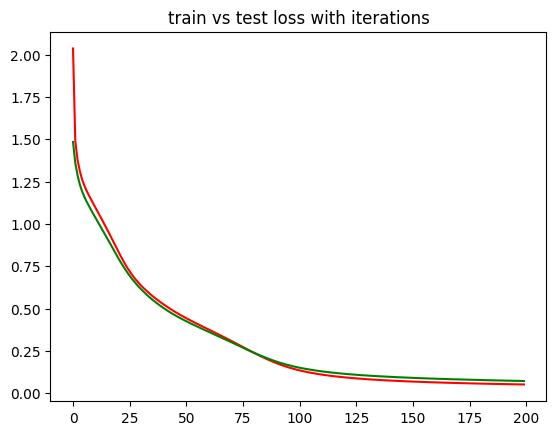

In [ ]:
model_multi_class.eval()
with torch.inference_mode():
  print(f"train accuracy: {train_accuracy}")
  print(f"test accuracy: {test_accuracy}")

  plt.plot(epoch_count, train_loss_count, c='r')
  plt.plot(epoch_count, test_loss_count, c='g')
  plt.title('train vs test loss with iterations')

In [ ]:
#test on some random data from test data
i = torch.randint(0, len(X_blob_test), size =[1]).item()
p = model_multi_class(X_blob_test[i]).squeeze()
pred = torch.softmax(p, dim=0).argmax(dim=0)
p.shape, pred.squeeze(), Y_blob_test[i].squeeze()

(torch.Size([4]), tensor(0), tensor(0))

In [ ]:
#How do i impliment one_vs_all classification?

In [ ]:
#torch.tensor


#DATA
#torch.utils.data.DataSets - Base datasets
#torch.utils.data.DataLoader - creates a python iterable over a dataset
#torchvision.transforms - functions for manipultating images
#torch.datasets- get datasets and data loading functions for computer vision

#MODELS
#torch.nn
#torch.nn.Module
#torchvision.models - pretrained computer vision models

#PARAMETERS
#torch.optim
#torch.CrossEntopyLOss()

#EVALUATION and EXPERIMENT
#torchmetrics
#toch.utils.tensorboard

#SAVE AND LOAD
#torch.save
#torch.load


NEXT>>>> CONVOLUTIONAL NEURAL NETWORKS are good FOR COMPUTER VISION>>>>>
#also @ standford: https://cs231n.github.io/

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


print(torch.__version__)
print(torchvision.__version__)

2.3.0+cu121
0.18.0+cu121


----PREPARE DATA

In [ ]:
#prepare torchvision.datasets.FashionMNIST dataset
#ToTensor() converts PIL image or numpy.ndarray() of shape (H x W x C) in range (0, 255) to a float tensor of size (C x H x W) in range (0.0, 1.0)

from torchvision import datasets

train_data = datasets.FashionMNIST(
    root = "data",
    download =True,
    train = True,
    transform = torchvision.transforms.ToTensor(), #how do we want to transform the data
    target_transform = None  #how do we want to transform the labels


)

test_data = datasets.FashionMNIST(
    root = "data",
    download = True,
    train = False,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None
)

100%|██████████| 26421880/26421880 [00:14<00:00, 1828021.55it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 124089.47it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:04<00:00, 900974.18it/s] 


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 14891225.51it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# 1x 28 x 28 because greyscale images have 1 color channel
image, label = train_data[0]
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [ ]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

Text(0.5, 1.0, 'Ankle boot')

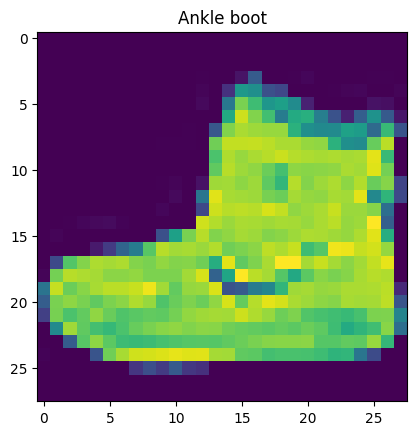

In [ ]:
#visualize
image, label = train_data[0]
plt.imshow(image.squeeze()) #for (28 x 28) instead of (1x28x28)
plt.title(train_data.classes[label])

(-0.5, 27.5, 27.5, -0.5)

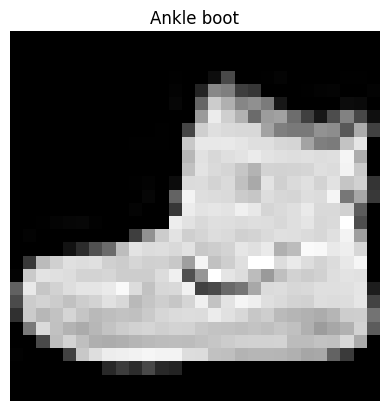

In [ ]:
plt.imshow(image.squeeze(), cmap = 'gray')
plt.title(train_data.classes[label])
plt.axis(False)


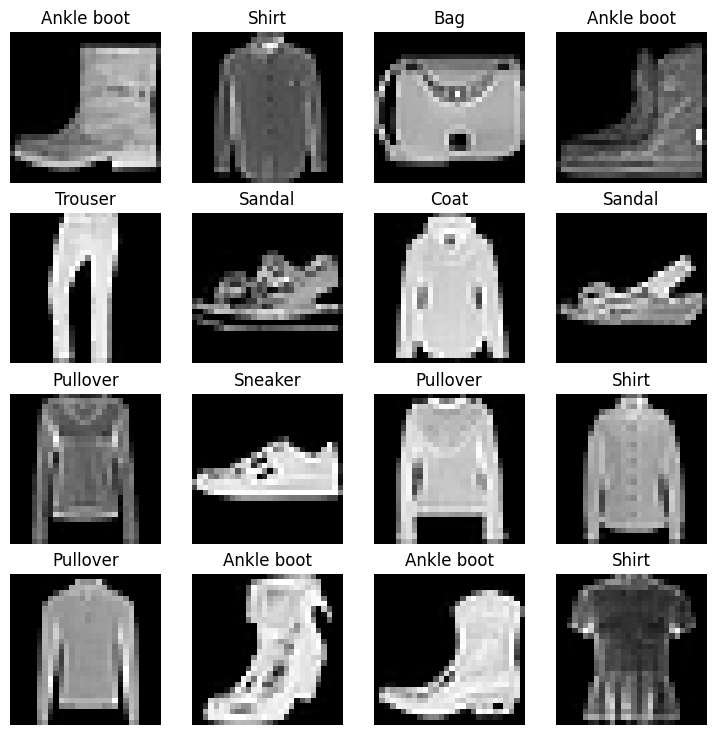

In [ ]:
#more images
fig = plt.figure(figsize=(9,9))
rows, columns = 4, 4

for i in range(1, rows*columns+1):
  random_idx = torch.randint(0, len(train_data), size =[1]).item()
  image, label = train_data[random_idx]
  fig.add_subplot(rows, columns, i)
  plt.imshow(image.squeeze(), cmap='gray')
  plt.title(train_data.classes[label])
  plt.axis(False)


In [ ]:
# we can clearly see we would need some slight form of non-linearity

In [ ]:
# data is currently of type pytorch 'Dataset'
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
# DataLoader would turn our data into a python iterable object of mini-batches
# we would have to train the model with mini-batches for computational efficiency and
# for our model to update its gradient after each batch size(of 32), a concept known as mini-batch gradient descent.
# shape is of form (32, 28, 28, 1)

In [ ]:
# we pass our data through DataLoader
from torch.utils.data import DataLoader

train_dataloader = DataLoader(
    dataset = train_data,
    batch_size = 32,
    shuffle = True
)

test_dataloader = DataLoader(
    dataset = test_data,
    batch_size = 32,
    shuffle = False
)



In [ ]:
len(train_dataloader), len(train_dataloader.dataset), len(test_dataloader), len(test_dataloader.dataset)

(1875, 60000, 313, 10000)

In [ ]:
train_dataloader.dataset, test_dataloader.batch_size

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 32)

In [ ]:
#practice
a = iter([1,2,3])
for i in range(3):
  print(next(a))



1
2
3


In [ ]:
#32 images of size 1 x 28 x 28 and their labels in each batch
train_batch_features, train_batch_labels = next(iter(train_dataloader))
train_batch_features.shape, train_batch_labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
train_batch_labels

tensor([5, 1, 8, 1, 5, 2, 6, 7, 3, 5, 9, 5, 7, 5, 0, 4, 4, 4, 4, 6, 1, 8, 0, 1,
        9, 7, 8, 8, 3, 3, 7, 2])

torch.Size([1, 28, 28])

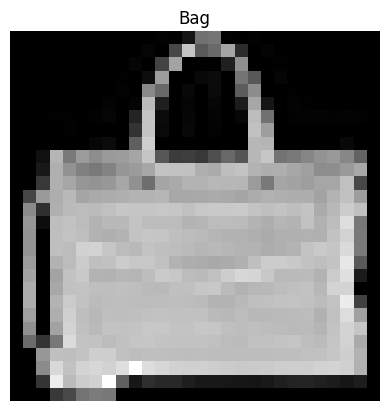

In [ ]:
#lets take a look at some examples from this batch

random_idx = torch.randint(0, len(train_batch_features), size =[1]).item()
image, label = train_batch_features[random_idx], train_batch_labels[random_idx]
plt.imshow(image.squeeze(), cmap = 'gray')
plt.title(train_data.classes[label])
plt.axis(False)

image.shape

In [ ]:
#time to model
#intoducing nn.Flatten

flattened_img = nn.Flatten()
img = train_batch_features[0]
new_img = flattened_img(img)

print(f"original image shape: {img.shape}, modified image shape to: {new_img.shape}")


original image shape: torch.Size([1, 28, 28]), modified image shape to: torch.Size([1, 784])


In [ ]:
#thus we may introduce a layer to flatten the dimension of our input images using nn.Flatten representing each and every pixel of the image

In [ ]:
class_names = train_data.classes
len(class_names)

10

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
#A base model we can build on
class FashionMNIST_model(nn.Module):
  def __init__(self, input_features, hidden_units, output_classes):
    super().__init__()
    self.layer_architecture = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_features, out_features = hidden_units),
        nn.Linear(in_features = hidden_units, out_features = output_classes)
    )

  def forward(self, x: torch.Tensor)-> torch.Tensor:
    return self.layer_architecture(x)

In [ ]:
model_F = FashionMNIST_model(input_features = 1*28*28,
                             hidden_units = 8,
                             output_classes = len(train_data.classes)).to(device)

In [ ]:
model_F

FashionMNIST_model(
  (layer_architecture): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=10, bias=True)
  )
)

In [ ]:
model_F.state_dict()

OrderedDict([('layer_architecture.1.weight',
              tensor([[ 0.0022, -0.0244,  0.0110,  ..., -0.0349, -0.0256, -0.0324],
                      [-0.0108, -0.0130,  0.0051,  ..., -0.0073,  0.0168, -0.0336],
                      [ 0.0138,  0.0164,  0.0230,  ...,  0.0078, -0.0197,  0.0102],
                      ...,
                      [ 0.0337,  0.0117,  0.0129,  ..., -0.0192,  0.0026, -0.0148],
                      [ 0.0113, -0.0076, -0.0120,  ...,  0.0199,  0.0124,  0.0354],
                      [ 0.0303, -0.0244,  0.0215,  ..., -0.0215,  0.0158, -0.0180]])),
             ('layer_architecture.1.bias',
              tensor([-0.0114,  0.0191,  0.0343,  0.0318,  0.0141,  0.0013,  0.0268,  0.0316])),
             ('layer_architecture.2.weight',
              tensor([[ 0.1587,  0.1039,  0.0853,  0.0360,  0.2334,  0.1000, -0.2981, -0.2088],
                      [-0.3211, -0.1063,  0.0181, -0.1499, -0.3252, -0.2299,  0.1505, -0.0249],
                      [-0.0593,  0.0572, -0.

In [ ]:
#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_F.parameters(), lr = 0.01)

In [ ]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [ ]:
metric = Accuracy(task='multiclass', num_classes=10)

In [ ]:
metric

MulticlassAccuracy()

round 1
details after  375th batch: accumulated batch loss: 0.3968164876302083,        batch accuracy over trained batches so far: 0.86275, batch accuracy over entire batches: 0.17255
details after  750th batch: accumulated batch loss: 0.4001798502604167,        batch accuracy over trained batches so far: 0.862125, batch accuracy over entire batches: 0.34485
details after  1125th batch: accumulated batch loss: 0.4022878689236111,        batch accuracy over trained batches so far: 0.8608611111111111, batch accuracy over entire batches: 0.5165166666666666
details after  1500th batch: accumulated batch loss: 0.398757568359375,        batch accuracy over trained batches so far: 0.862, batch accuracy over entire batches: 0.6896
details after  1875th batch: accumulated batch loss: 0.39641728515625,        batch accuracy over trained batches so far: 0.8622333333333333, batch accuracy over entire batches: 0.8622333333333333
round 2
details after  375th batch: accumulated batch loss: 0.38448474

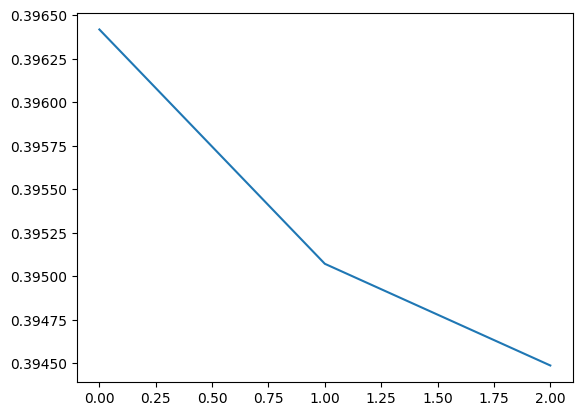

In [ ]:

torch.manual_seed(42)
#train time, Ooohh!!!
#one epoch will go through each batch of our data, about len(train_loader) times, each time calculating predictions and loss
total_loss_count = []
epoch_count = []
for i in range(3):
  print(f"round {i+1}")
  epoch_count.append(i)

  batch_passes = len(train_dataloader)
  model_F.train()
  total_loss = 0
  total_accuracy = 0
  current_batch = iter(train_dataloader)

  for batch_pass in range(1, batch_passes+1):
    #calculate predictions and loss each batch pass
    current_batch_train, current_batch_train_labels = next(current_batch)
    current_batch_logits = model_F(current_batch_train).squeeze()
    current_batch_preds = torch.softmax(current_batch_logits, dim=1).argmax(dim=1)

    current_batch_loss = criterion(current_batch_logits, current_batch_train_labels)
    total_loss = total_loss + current_batch_loss

    accuracy = metric(current_batch_preds, current_batch_train_labels)
    total_accuracy = total_accuracy + accuracy.item()
    #refresh accumulated gradients
    optimizer.zero_grad()
    current_batch_loss.backward()
    #update weights
    optimizer.step()

    #note that loss and accuracy is averaged over the entire batches to see if we could get desired accuracy after some number of batches
    if batch_pass%375==0:
      print(f"details after  {batch_pass}th batch: accumulated batch loss: {total_loss.item()/batch_pass}, \
       batch accuracy over trained batches so far: {total_accuracy/batch_pass}, batch accuracy over entire batches: {total_accuracy/batch_passes}")

  #accumulate average loss from each batch
  total_loss_count.append(total_loss/batch_passes)
with torch.inference_mode():
  plt.plot(epoch_count, total_loss_count)






In [ ]:
#accuracy seems to increase after each batch
#a simple linear model has an accuracy of over 80% after a few iterations on the MNIST Fashion dataset???

In [ ]:
#practice

i, j = next(iter(train_dataloader))
i, j

In [ ]:
try:
  from torchinfo import summary
  print("torchinfo found, importing....")
except:
  !pip install torchinfo
  print("torchinfo not found, downloading....")


summary(model_F, (1,28,28))

torchinfo found, importing....


Layer (type:depth-idx)                   Output Shape              Param #
FashionMNIST_model                       [1, 10]                   --
├─Sequential: 1-1                        [1, 10]                   --
│    └─Flatten: 2-1                      [1, 784]                  --
│    └─Linear: 2-2                       [1, 8]                    6,280
│    └─Linear: 2-3                       [1, 10]                   90
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
Total mult-adds (M): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.03

In [ ]:
#practice
fruits =[["first","apple", ], ["2nd","orange"], ["3rd","pineapple"]]
fruit = enumerate(fruits)

for i, (j,k) in fruit:
  print(i,j,k)

# may now replace iter() and next, with enumerate()

0 first apple
1 2nd orange
2 3rd pineapple


In [ ]:
#a bit of insight into running time
from timeit import default_timer as timer

def print_run_time(start: float, end: float, device: torch.device = None):
  total_time = end - start
  print(f"total run time on {device} is {total_time:.3f} seconds")

In [ ]:
#practice
start = timer()
###
end = timer()
print_run_time(start, end, device)

total run time on cpu is 0.000 seconds


In [ ]:
device

'cpu'

In [ ]:
#what about some aesthetics with a progress bar!
from tqdm.auto import tqdm

In [ ]:
#practice
for i in tqdm(range(2)):
  print(i)

  0%|          | 0/2 [00:00<?, ?it/s]

0
1


In [ ]:
#practice
for i in range(3):

  a = 1/(1 if i==0 else i)
  print(a)

1.0
1.0
0.5


  0%|          | 0/3 [00:00<?, ?it/s]


Now training round 1.....

batch: 0, batch_loss: 0.24275162816047668, batch_accuracy: 0.90625
batch: 375, batch_loss: 0.39557652656237285, batch_accuracy: 0.8659166666666667
batch: 750, batch_loss: 0.39775785560409227, batch_accuracy: 0.8642083333333334
batch: 1125, batch_loss: 0.40020722050468127, batch_accuracy: 0.8623055555555555
batch: 1500, batch_loss: 0.3962415191754699, batch_accuracy: 0.8634166666666667

 Now testing..... 

test_batch: 0, batch_loss: 0.3794744908809662, batch_accuracy: 0.84375
test_batch: 100, batch_loss: 0.4371319326758385, batch_accuracy: 0.850625
test_batch: 200, batch_loss: 0.45460357047617433, batch_accuracy: 0.84421875
test_batch: 300, batch_loss: 0.44846816768248876, batch_accuracy: 0.8432291666666667

Now training round 2.....

batch: 0, batch_loss: 0.267993688583374, batch_accuracy: 0.9375
batch: 375, batch_loss: 0.3911148744821549, batch_accuracy: 0.865
batch: 750, batch_loss: 0.3913846658070882, batch_accuracy: 0.8635416666666667
batch: 1125, batch_

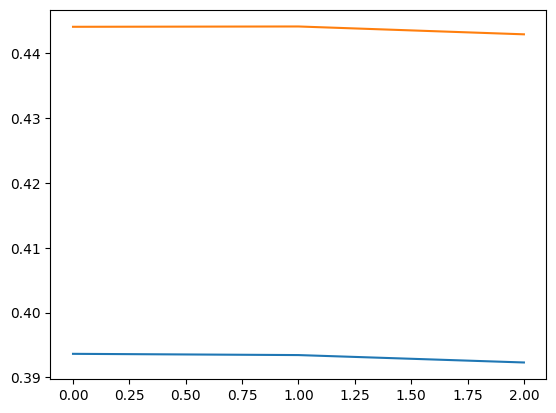

In [ ]:
start = timer()
#train
torch.manual_seed(42)
train_loss_count = []
test_loss_count = []
epoch_count = []

epochs = 3

for epoch in tqdm(range(epochs)):
  epoch_count.append(epoch)

  model_F.train()
  train_loss = 0
  test_loss = 0
  train_accuracy = 0
  test_accuracy = 0

  print(f"\nNow training round {epoch+1}.....\n")

  for batch_pass, (X, y) in enumerate(train_dataloader):


    train_batch_logits = model_F(X)
    train_batch_preds = torch.softmax(train_batch_logits, dim=1).argmax(dim=1)

    train_batch_loss = criterion(train_batch_logits, y)
    train_loss += train_batch_loss.item()

    train_batch_accuracy = metric(train_batch_preds, y)
    train_accuracy += train_batch_accuracy.item()


    optimizer.zero_grad()

    train_batch_loss.backward()

    optimizer.step()

    if batch_pass%375==0:
      print(f"batch: {batch_pass}, batch_loss: {train_loss/(1 if batch_pass==0 else batch_pass)}, batch_accuracy: {train_accuracy/(1 if batch_pass==0 else batch_pass)}")

  train_loss_count.append(train_loss/len(train_dataloader))



  #test and evaluation
  model_F.eval()

  with torch.inference_mode():
    print("\n Now testing..... \n")

    for batch_pass, (X_test, y_test) in enumerate(test_dataloader):

      test_batch_logits = model_F(X_test)
      test_batch_preds = torch.softmax(test_batch_logits, dim=1).argmax(dim=1)

      test_batch_loss = criterion(test_batch_logits, y_test)
      test_batch_accuracy = metric(test_batch_preds, y_test)
      test_accuracy += test_batch_accuracy.item()

      test_loss += test_batch_loss.item()

      if batch_pass%100==0:
        print(f"test_batch: {batch_pass}, batch_loss: {test_loss/(1 if batch_pass==0 else batch_pass)}, batch_accuracy: {test_accuracy/(1 if batch_pass==0 else batch_pass)}")

  test_loss_count.append(test_loss/len(test_dataloader))

end = timer()
model_F.eval()
with torch.inference_mode():
  print("\n")
  print_run_time(start, end, device)

  plt.plot(epoch_count, train_loss_count)
  plt.plot(epoch_count, test_loss_count)


In [ ]:
#intoducing some automation for training, testing and evluation

#train

def train(model: torch.nn.Module,
          dataloader: torch.utils.data.DataLoader,
          criterion: torch.nn.Module,
          optimizer: torch.optim.Optimizer,
          accuracy_fn,
          device: torch.device = device):
  """ trains model with dataloader"""
  train_loss, train_acc = 0, 0

  model.train()
  for batch, (X, y) in tqdm(enumerate(dataloader)):
    #foward to calculate preds and accumulate loss and accuracy per batch
    y_logits = model(X)
    loss = criterion(y_logits, y)
    train_loss+= loss
    train_acc += accuracy_fn(torch.softmax(y_logits, dim=1).argmax(dim=1),
                       y)
    #calculate gradient and do gradient update per batch
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # calculate train_loss and accuracy over all batches
  train_loss /=len(dataloader)
  train_acc /= len(dataloader)

  print(f"Train loss: {train_loss}, Train accuracy: {train_acc}")

#test

def test(model: torch.nn.Module,
         dataloader: torch.utils.data.DataLoader,
         criterion: torch.nn.Module,
         accuracy_fn,
         device: torch.device=device
         ):
  """tests trained model on a test dataloader"""

  model.eval()
  test_loss, test_acc = 0, 0
  with torch.inference_mode():
    #calculate preds on and accuracy of preds on test dataloader
    for batch, (X_test, y_test) in tqdm(enumerate(dataloader)):
      test_logits = model(X_test)
      loss = criterion(test_logits, y_test)
      test_loss += loss
      test_acc += accuracy_fn(torch.softmax(test_logits, dim=1).argmax(dim=1),
                              y_test)
    #calculate test_loss and accuracy over all batches
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

    print(f"Test loss: {test_loss}, Test accuracy: {test_acc}")










#evaluate



def eval_model(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               criterion: torch.nn.Module,
               accuracy_fn):
  """returns a dictionary containing model result on dataloader"""
  loss = 0
  acc = 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(dataloader):
      #foward
      y_preds = model(X)

      #accumulate loss and accuracy per batch
      loss += criterion(y_preds, y)
      acc += accuracy_fn(y,
                         torch.softmax(y_preds, dim=1).argmax(dim=1))

    #average loss and accuracy per batch
    loss/= len(dataloader)
    acc/=len(dataloader)

  return {"model_name": model.__class__.__name__,
          "loss": loss.item(),
          "accuracy": acc.item()
          }







In [ ]:
class FashionMNIST_modelV2(nn.Module):
  def __init__(self, input_features, hidden_units, output_features):
    super().__init__()
    self.layer_architecture = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_features, hidden_units),
        nn.ReLU(),
        nn.Linear(hidden_units, output_features),

    )

  def forward(self, x: torch.Tensor)-> torch.Tensor:
    return self.layer_architecture(x)


In [ ]:
model_F2 = FashionMNIST_modelV2(
    input_features = 1*28*28,
    hidden_units = 8,
    output_features = len(train_data.classes)
)

In [ ]:
len(train_data.classes)

10

In [ ]:
#update optimizer
optimizer = torch.optim.SGD(params=model_F2.parameters(), lr =0.1)

In [ ]:
#train and test, waaaa!!!!!
torch.manual_seed(42)
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"round {epoch+1}..........")

  train(model_F2, train_dataloader, criterion=criterion, optimizer=optimizer, accuracy_fn=metric)
  #use current model state to test
  test(model_F2, test_dataloader, criterion=criterion, accuracy_fn=metric)

  print("\n")


  0%|          | 0/3 [00:00<?, ?it/s]

round 1..........


0it [00:00, ?it/s]

Train loss: 0.7068661451339722, Train accuracy: 0.736133337020874


0it [00:00, ?it/s]

Test loss: 0.5905793309211731, Test accuracy: 0.793430507183075


round 2..........


0it [00:00, ?it/s]

Train loss: 0.49402883648872375, Train accuracy: 0.8224499821662903


0it [00:00, ?it/s]

Test loss: 0.5458428859710693, Test accuracy: 0.799420952796936


round 3..........


0it [00:00, ?it/s]

Train loss: 0.4627227187156677, Train accuracy: 0.8335833549499512


0it [00:00, ?it/s]

Test loss: 0.475333571434021, Test accuracy: 0.8303713798522949




In [ ]:
#In the pytorch lesson, Daniel may have mistakenly added a final nn.ReLU layer in the architecture, which equally means throwing away some important values for prediction
#this caused the accuracy to reduce to about 76% (after two epochs) as opposed to about an 83% accuracy without a final ReLU layer, which I suppose is the appropriate form for logits for CrossEntropyLoss
#reminder is !!!!!ReLU is not a final layer activation function!!!!!
#also the performance of FashionMNIST_model(without a non_linear layer) and FashionMINIST_modelV2(with a non-linear layer) on the FashionMINST dataset are comparable

In [ ]:
#evaluate model on test dataloader
eval_model(model_F2, test_dataloader, criterion=criterion, accuracy_fn=metric)

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNIST_modelV2',
 'loss': 0.475333571434021,
 'accuracy': 0.8303713798522949}

In [ ]:
# @title CONVOLUTIONAL NEURAL NETWORKS
# CoVNets are great with images. Let's give it a try

class CovNet_simple(nn.Module):
  def __init__(self, input_channels, hidden_units, output):
    super().__init__()

    self.conv_block1 = nn.Sequential(
        nn.Conv2d(in_channels=input_channels, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(num_features=hidden_units),
        nn.ReLU(),

    )
    self.conv_block2 = nn.Sequential(
      nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
      nn.BatchNorm2d(num_features=hidden_units),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size = 2)

  )
    self.conv_block3 = nn.Sequential(
    nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=2, stride=1, padding=0),
    nn.BatchNorm2d(num_features=hidden_units),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size = 2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*6*6, out_features = output),
        #nn.ReLU(),
        #nn.Linear(in_features =output, out_features=output)
    )

  def forward(self, x: torch.Tensor)-> torch.Tensor:
    x = self.conv_block1(x)
    #print(x.shape)
    x= self.conv_block2(x)
    #print(x.shape)
    x = self.conv_block3(x)
    #print(x.shape)
    x = self.classifier(x)
    #print(x.shape)
    return x


In [ ]:
model_F3 = CovNet_simple(1,10,10)
model_F3.state_dict()

OrderedDict([('conv_block1.0.weight',
              tensor([[[[-0.3066, -0.2168,  0.1419],
                        [-0.0235, -0.0559,  0.0540],
                        [-0.0704, -0.1817, -0.1530]]],
              
              
                      [[[-0.1359, -0.3120, -0.3074],
                        [-0.1263,  0.1251,  0.3260],
                        [-0.0090,  0.2276,  0.1102]]],
              
              
                      [[[-0.2655, -0.1668, -0.0915],
                        [-0.2747,  0.0467,  0.0792],
                        [-0.2598, -0.0702, -0.2940]]],
              
              
                      [[[ 0.3319,  0.1972, -0.1257],
                        [ 0.2866, -0.2086,  0.2804],
                        [-0.1283,  0.0974,  0.2316]]],
              
              
                      [[[ 0.1552,  0.0808, -0.0384],
                        [ 0.0025,  0.2846, -0.1089],
                        [-0.1082,  0.0426, -0.1617]]],
              
              
       

In [ ]:
t = torch.ones(1,1,28,28)
model_F3(t)



tensor([[-0.5362,  0.6587, -0.3722,  0.1409,  0.4335, -0.4501, -0.6644, -0.8013,
          0.3620, -0.6403]], grad_fn=<AddmmBackward0>)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_F3.parameters(), lr =0.1)

In [ ]:
torch.manual_seed(42)
for i in tqdm(range(3)):
  print(f"epoch {i+1}......")
  train(model_F3, train_dataloader, criterion=criterion, optimizer = optimizer, accuracy_fn=metric)
  test(model_F3, test_dataloader, criterion, metric)
  print("\n")

  0%|          | 0/3 [00:00<?, ?it/s]

epoch 1......


0it [00:00, ?it/s]

Train loss: 0.43220001459121704, Train accuracy: 0.8434333205223083


0it [00:00, ?it/s]

Test loss: 0.3482830226421356, Test accuracy: 0.8765974640846252


epoch 2......


0it [00:00, ?it/s]

Train loss: 0.3205462098121643, Train accuracy: 0.8840500116348267


0it [00:00, ?it/s]

Test loss: 0.31904304027557373, Test accuracy: 0.8864816427230835


epoch 3......


0it [00:00, ?it/s]

Train loss: 0.29217857122421265, Train accuracy: 0.8950833082199097


0it [00:00, ?it/s]

Test loss: 0.3062906563282013, Test accuracy: 0.8902755379676819




In [ ]:
#compare results of 3  models
model_0_results = eval_model(model_F, test_dataloader, criterion, metric )
model_01_results = eval_model(model_F2, test_dataloader, criterion, metric)
model_02_results = eval_model(model_F3, test_dataloader, criterion, metric)



  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
dataframe = pd.DataFrame([model_0_results, model_01_results, model_02_results])
dataframe

model_name      loss  accuracy
0    FashionMNIST_model  0.442891  0.842452
1  FashionMNIST_modelV2  0.475334  0.830371
2         CovNet_simple  0.306291  0.890276

<Axes: ylabel='model_name'>

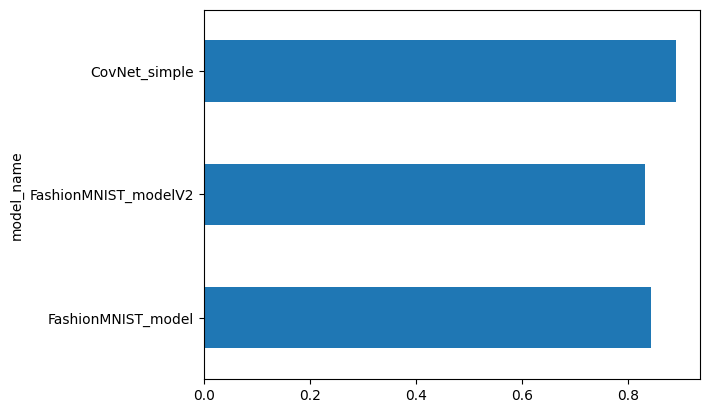

In [ ]:
dataframe.set_index("model_name")["accuracy"].plot(kind="barh")

In [ ]:
a = [1,2,3,1]
b= a.count(1)
b


2

In [ ]:
import pandas as pd
a = {"name": "a", "age":10}
b={"name":"b", "age":11}
data = pd.DataFrame([a,b])
data

name  age
0    a   10
1    b   11

In [ ]:
import requests
from pathlib import Path

#Download if not available
if Path("rosy.py").is_file():
  print("file already exists, skipping Download")
else:
  print("Downloading ros key")
  request = requests.get("https://raw.githubusercontent.com/ros/rosdistro/master/rosdep/base.yaml")
  with open("ros.yaml", "wb") as f:
    f.write(request.content)